#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np 

import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image

from scipy.stats import poisson

!pip install plotly
!pip install -U kaleido
pd.set_option('mode.chained_assignment', None)


Requirement already up-to-date: kaleido in /Users/teja/opt/anaconda3/lib/python3.7/site-packages (0.0.3.post1)


In [2]:
import os

if not os.path.exists("../images"):
    os.mkdir("../images")

#### Read data from covid_large csv file

In [3]:
# read data from covid_large csv file
covid_large_df = pd.read_csv("../data/covid_large.csv")
covid_large_df.head()

State  countyFIPS            County Name        Date  Num of Cases  \
0    AL           0  statewide unallocated  2020-01-22             0   
1    AL           0  statewide unallocated  2020-01-23             0   
2    AL           0  statewide unallocated  2020-01-24             0   
3    AL           0  statewide unallocated  2020-01-25             0   
4    AL           0  statewide unallocated  2020-01-26             0   

   Num of Deaths  population  
0              0           0  
1              0           0  
2              0           0  
3              0           0  
4              0           0

#### Converting 'Date' column to Date type

In [4]:
covid_large_df['Date'] = covid_large_df.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

### Statistics(mean, median, mode)  and comparision between the 5 states

#### Choosing 5 States - "CA","NC","NY","TX","FL","VA"

In [5]:
COVID_5_states = covid_large_df.loc[(covid_large_df["State"].isin(["CA","NC","NY","TX","FL","VA"]))]

COVID_5_states.head()

State  countyFIPS            County Name       Date  Num of Cases  \
45267    CA           0  statewide unallocated 2020-01-22             0   
45268    CA           0  statewide unallocated 2020-01-23             0   
45269    CA           0  statewide unallocated 2020-01-24             0   
45270    CA           0  statewide unallocated 2020-01-25             0   
45271    CA           0  statewide unallocated 2020-01-26             0   

       Num of Deaths  population  
45267              0           0  
45268              0           0  
45269              0           0  
45270              0           0  
45271              0           0

#### Getting new cases and new deaths using diff()

In [6]:
COVID_5_states['Num of New Cases'] = COVID_5_states['Num of Cases'].diff()
COVID_5_states['Num of New Deaths'] = COVID_5_states['Num of Deaths'].diff()

# Cleaning data by changing negative values to 0
COVID_5_states['Num of New Cases'][COVID_5_states['Num of New Cases'] < 0] = 0
COVID_5_states['Num of New Deaths'][COVID_5_states['Num of New Deaths'] < 0] = 0

# Removing 1st date for every state
COVID_5_states= COVID_5_states[COVID_5_states['Date'] != '2020-01-22']

COVID_5_states= COVID_5_states.drop(['Num of Cases','Num of Deaths'], axis=1)

# COVID_5_states[(COVID_5_states["countyFIPS"] == 6021) & (COVID_5_states["Date"] >= '2020-07-01') & (COVID_5_states["Date"] <= '2020-07-03')]

####  Number of new cases and new deaths per day

In [7]:
# Groupingby "State" and "Date" and aggregating by sum

COVID_5_states_bydate = COVID_5_states.groupby(["State","Date"]).sum().reset_index()

COVID_5_states_bydate.head()

State       Date  countyFIPS  population  Num of New Cases  \
0    CA 2020-01-23      357364    39512223               0.0   
1    CA 2020-01-24      357364    39512223               0.0   
2    CA 2020-01-25      357364    39512223               0.0   
3    CA 2020-01-26      357364    39512223               2.0   
4    CA 2020-01-27      357364    39512223               1.0   

   Num of New Deaths  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

#### Normalizing new cases and deaths by population

In [8]:
#Normalized based on states population per 1M
COVID_5_states_bydate['Num of New Cases Normalized']= (COVID_5_states_bydate['Num of New Cases']/COVID_5_states_bydate["population"])*1000000
COVID_5_states_bydate['Num of New Deaths Normalized']= (COVID_5_states_bydate['Num of New Deaths']/COVID_5_states_bydate["population"])*1000000

COVID_5_states_bydate.head()

State       Date  countyFIPS  population  Num of New Cases  \
0    CA 2020-01-23      357364    39512223               0.0   
1    CA 2020-01-24      357364    39512223               0.0   
2    CA 2020-01-25      357364    39512223               0.0   
3    CA 2020-01-26      357364    39512223               2.0   
4    CA 2020-01-27      357364    39512223               1.0   

   Num of New Deaths  Num of New Cases Normalized  \
0                0.0                     0.000000   
1                0.0                     0.000000   
2                0.0                     0.000000   
3                0.0                     0.050617   
4                0.0                     0.025309   

   Num of New Deaths Normalized  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0

#### Weekly mean value of number of new cases and deaths

In [9]:
COVID_5_states_byweek = COVID_5_states_bydate.groupby(["State", pd.Grouper(key='Date', freq='w')])['Num of New Cases Normalized','Num of New Deaths Normalized'].agg({'Num of New Cases Normalized':'mean',
                                                                                                'Num of New Deaths Normalized' :'mean'}).reset_index().round(decimals=0)
COVID_5_states_byweek.head()

State       Date  Num of New Cases Normalized  Num of New Deaths Normalized
0    CA 2020-01-26                          0.0                           0.0
1    CA 2020-02-02                          0.0                           0.0
2    CA 2020-02-09                          0.0                           0.0
3    CA 2020-02-16                          0.0                           0.0
4    CA 2020-02-23                          0.0                           0.0

#### Mean and Median of new cases and deaths for 5 states

In [10]:
COVID_5_states_byweek_AGG = COVID_5_states_byweek.groupby(["State"]).agg(["mean","median"]).reset_index()
COVID_5_states_byweek_AGG

State Num of New Cases Normalized        Num of New Deaths Normalized       
                               mean median                         mean median
0    CA                   82.228571   52.0                     1.628571    2.0
1    FL                  128.628571   49.0                     2.457143    2.0
2    NC                   74.885714   61.0                     1.200000    1.0
3    NY                   94.171429   34.0                     7.114286    1.0
4    TX                   97.142857   44.0                     2.057143    1.0
5    VA                   66.457143   74.0                     1.371429    1.0

Observations from mean and median - <br>
1. We can see that Florida state has higher mean value (128.6) of 'Num of New Cases' compared to other states, but the median (49) is less so the data might contain few weeks having sudden increase in 'Num of New Cases' <br>
2. New York and Texas has almost similar mean value of 'Num of New Cases'
3. New York state has higher Number of new deaths compared to other states in a week

#### Mode of new cases and deaths for 5 states

In [11]:
COVID_5_states_byweek.groupby(["State"]).agg(lambda x:x.value_counts().index[0])

Date  Num of New Cases Normalized  Num of New Deaths Normalized
State                                                                      
CA    2020-05-17                          0.0                           2.0
FL    2020-05-17                          0.0                           2.0
NC    2020-05-17                          0.0                           2.0
NY    2020-05-17                         34.0                           0.0
TX    2020-05-17                          0.0                           1.0
VA    2020-05-17                          0.0                           2.0

Observations from mode - <br>
1. We can see that "New York" has 34 new cases for multiple weeks, compared to other states <br>
2. The "Num of new deaths" in CA, FL,NC,VA has recorded 2 for multiple weeks

### Counties with high case and death rates in California

In [12]:
COVID_CA = COVID_5_states[COVID_5_states['State'] =='CA']

#groupby by county 
COVID_CA_bycounty = COVID_CA.groupby(['countyFIPS','County Name','population']).sum().reset_index()

#removing state unallocated and rows having 0 population
COVID_CA_bycounty = COVID_CA_bycounty[(COVID_CA_bycounty["countyFIPS"] != 0) & (COVID_CA_bycounty["population"] != 0)]

COVID_CA_bycounty.head()

countyFIPS       County Name  population  Num of New Cases  \
2        6001    alameda county     1671329           20022.0   
3        6003     alpine county        1129               2.0   
4        6005     amador county       39752             242.0   
5        6007      butte county      219186            2592.0   
6        6009  calaveras county       45905             298.0   

   Num of New Deaths  
2              333.0  
3                0.0  
4               16.0  
5               28.0  
6               10.0

In [13]:
COVID_CA_bycounty['Num of New Cases Normalized']= (COVID_CA_bycounty['Num of New Cases']/(COVID_CA_bycounty["population"]))*1000000
COVID_CA_bycounty['Num of New Deaths Normalized']= (COVID_CA_bycounty['Num of New Deaths']/(COVID_CA_bycounty["population"]))*1000000

COVID_CA_bycounty.sort_values(by=['Num of New Cases Normalized'], ascending=False).head(6)


countyFIPS      County Name  population  Num of New Cases  \
14        6025  imperial county      181215           11291.0   
12        6021     glenn county       28393            1567.0   
17        6031     kings county      152940            7125.0   
16        6029      kern county      900202           30850.0   
55        6107    tulare county      466195           15270.0   
25        6047    merced county      277680            8616.0   

    Num of New Deaths  Num of New Cases Normalized  \
14              308.0                 62307.204150   
12              125.0                 55189.659423   
17               77.0                 46586.896822   
16              332.0                 34270.086047   
55              251.0                 32754.534047   
25              129.0                 31028.522040   

    Num of New Deaths Normalized  
14                   1699.638551  
12                   4402.493572  
17                    503.465411  
16                    368.806112  
55                    538.401313  
25                    464.563526

In [14]:
COVID_CA_bycounty.sort_values(by=['Num of New Deaths Normalized'], ascending=False).head(6)


countyFIPS         County Name  population  Num of New Cases  \
12        6021        glenn county       28393            1567.0   
14        6025     imperial county      181215           11291.0   
15        6027         inyo county       18039             186.0   
20        6037  los angeles county    10039107          254656.0   
51        6099   stanislaus county      550660           16024.0   
55        6107       tulare county      466195           15270.0   

    Num of New Deaths  Num of New Cases Normalized  \
12              125.0                 55189.659423   
14              308.0                 62307.204150   
15               14.0                 10310.992849   
20             6231.0                 25366.399621   
51              313.0                 29099.625903   
55              251.0                 32754.534047   

    Num of New Deaths Normalized  
12                   4402.493572  
14                   1699.638551  
15                    776.096236  
20                    620.672735  
51                    568.408819  
55                    538.401313

### Plot daily trends (new cases and new deaths) of California and top 5 infected counties

In [15]:
COVID_CA_bydate = COVID_5_states_bydate[COVID_5_states_bydate["State"] == 'CA']
COVID_CA_bydate.head()

State       Date  countyFIPS  population  Num of New Cases  \
0    CA 2020-01-23      357364    39512223               0.0   
1    CA 2020-01-24      357364    39512223               0.0   
2    CA 2020-01-25      357364    39512223               0.0   
3    CA 2020-01-26      357364    39512223               2.0   
4    CA 2020-01-27      357364    39512223               1.0   

   Num of New Deaths  Num of New Cases Normalized  \
0                0.0                     0.000000   
1                0.0                     0.000000   
2                0.0                     0.000000   
3                0.0                     0.050617   
4                0.0                     0.025309   

   Num of New Deaths Normalized  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0

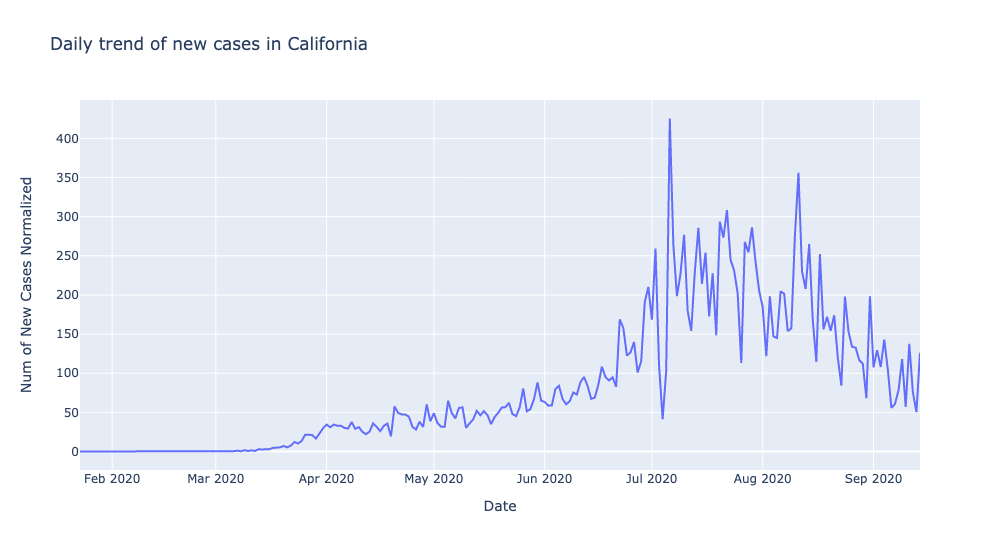

In [16]:
fig = px.line(COVID_CA_bydate, x="Date", y="Num of New Cases Normalized",title="Daily trend of new cases in California")
fig.write_image("../images/newcases_daily_trends_ca.png")
img_bytes = fig.to_image(format="png", width=1000, height=550, scale=1)
from IPython.display import Image
Image(img_bytes)

/Users/teja/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning:

divide by zero encountered in log



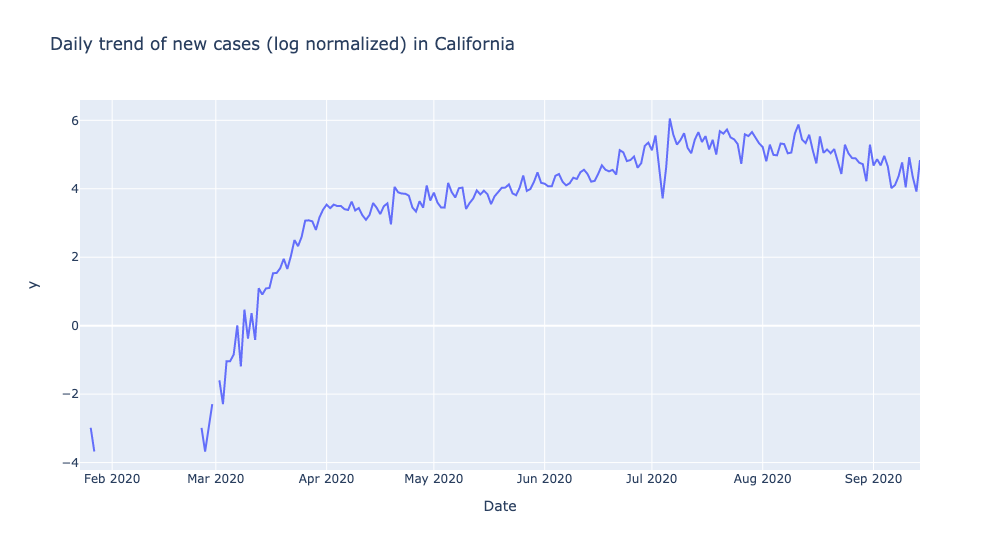

In [17]:
y = np.log(COVID_CA_bydate["Num of New Cases Normalized"])
fig = px.line(COVID_CA_bydate, x="Date", y=y,title="Daily trend of new cases (log normalized) in California")
fig.write_image("../images/newcases_daily_trends_log_ca.png")
img_bytes = fig.to_image(format="png", width=1000, height=550, scale=1)
from IPython.display import Image
Image(img_bytes)

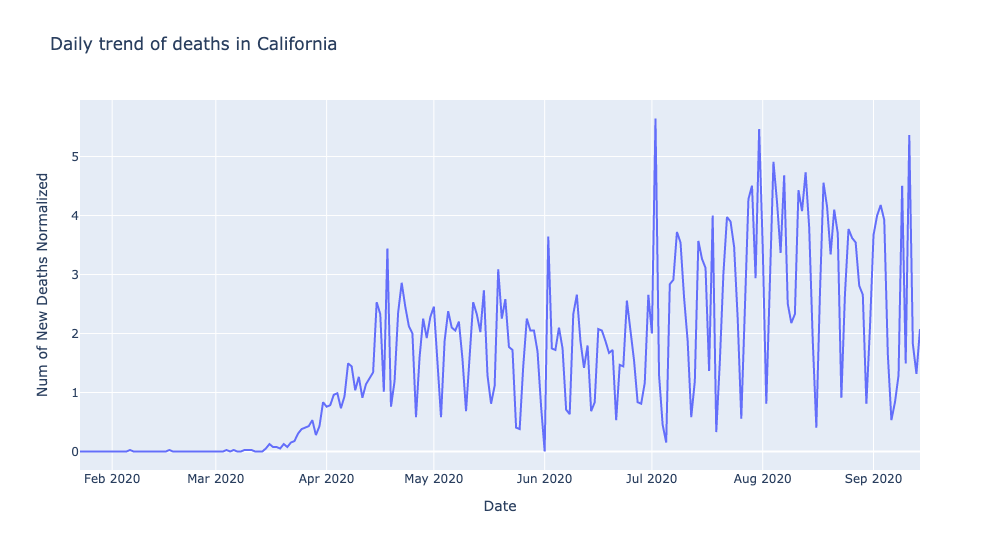

In [18]:
fig = px.line(COVID_CA_bydate, x="Date", y="Num of New Deaths Normalized",title="Daily trend of deaths in California")
fig.write_image("../images/newdeaths_daily_trends_ca.png")
img_bytes = fig.to_image(format="png", width=1000, height=550, scale=1)
from IPython.display import Image
Image(img_bytes)

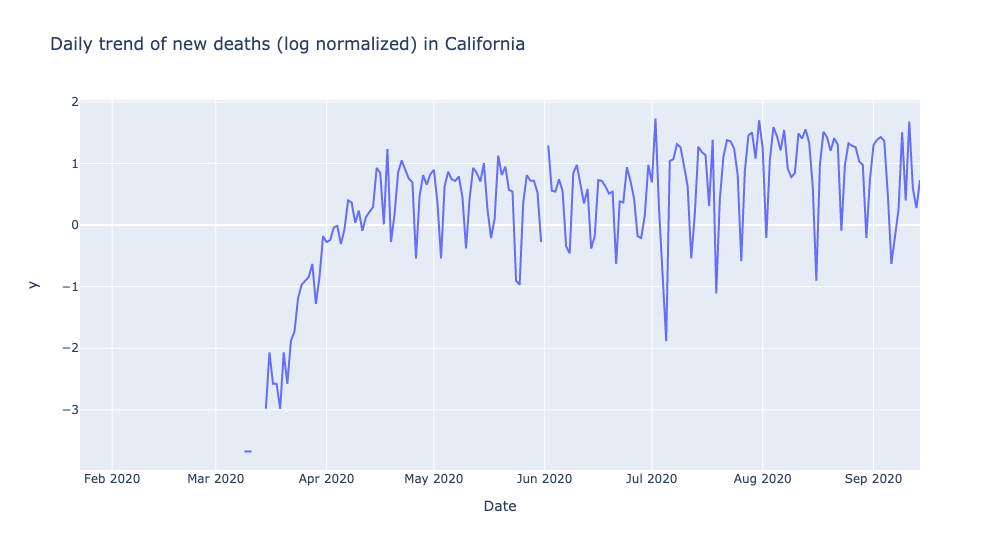

In [19]:
y = np.log(COVID_CA_bydate["Num of New Deaths Normalized"])
fig = px.line(COVID_CA_bydate, x="Date", y=y,title="Daily trend of new deaths (log normalized) in California")
fig.write_image("../images/newdeaths_daily_trends_log_ca.png")
img_bytes = fig.to_image(format="png", width=1000, height=550, scale=1)
from IPython.display import Image
Image(img_bytes)

### Daily Trend of Top 5 counties with high case rate in California

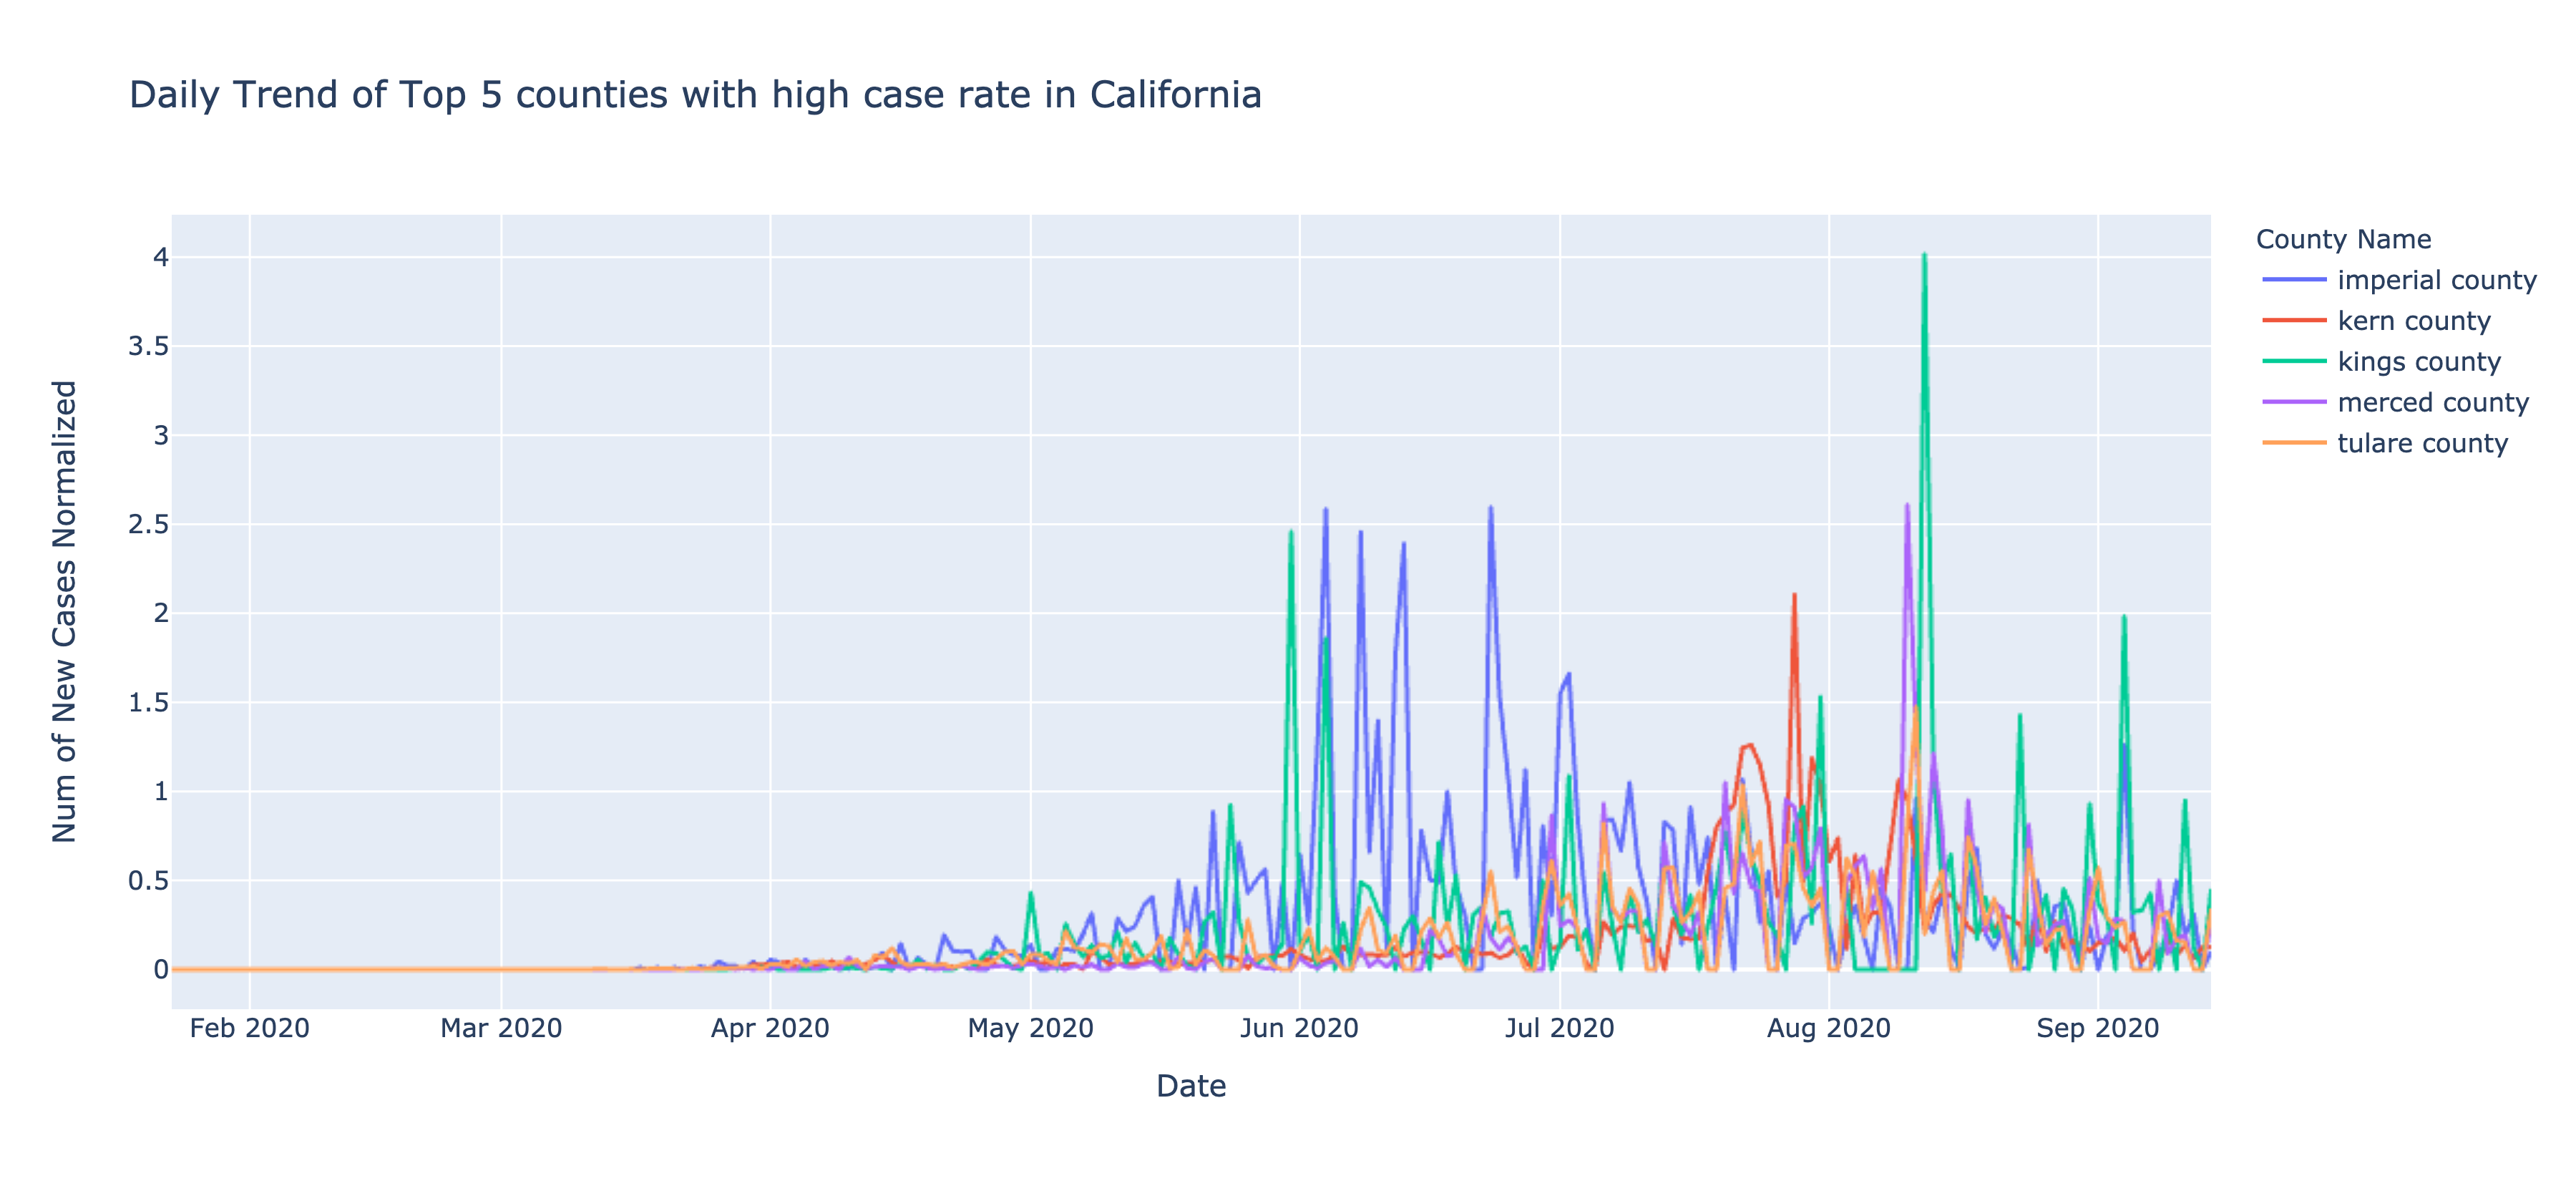

In [20]:
# Extracting per day data from COVID_CA dataframe using Top 5 countyFIPS value from COVID_CA_bycounty
COVID_top_5_counties_cases = COVID_CA[COVID_CA["countyFIPS"].isin(COVID_CA_bycounty.sort_values(by=['Num of New Cases Normalized'], ascending=False).head(6)['countyFIPS'])]

#Normalizing num of cases and deaths by population
COVID_top_5_counties_cases['Num of New Cases Normalized'] = (COVID_top_5_counties_cases['Num of New Cases']/COVID_top_5_counties_cases['population'])*1000
COVID_top_5_counties_cases['Num of New Deaths Normalized'] = (COVID_top_5_counties_cases['Num of New Deaths']/COVID_top_5_counties_cases['population'])*1000
COVID_top_5_counties_cases = COVID_top_5_counties_cases[COVID_top_5_counties_cases['countyFIPS'] != 6021]

fig = px.line(COVID_top_5_counties_cases, x="Date", y="Num of New Cases Normalized", color="County Name", title="Daily Trend of Top 5 counties with high case rate in California")
fig.write_image("../images/top5cases_counties_ca.png")
img_bytes = fig.to_image(format="png", width=1200, height=550, scale=3)
from IPython.display import Image
Image(img_bytes)


#### Daily Trend of Top 5 counties with High Death rate in California

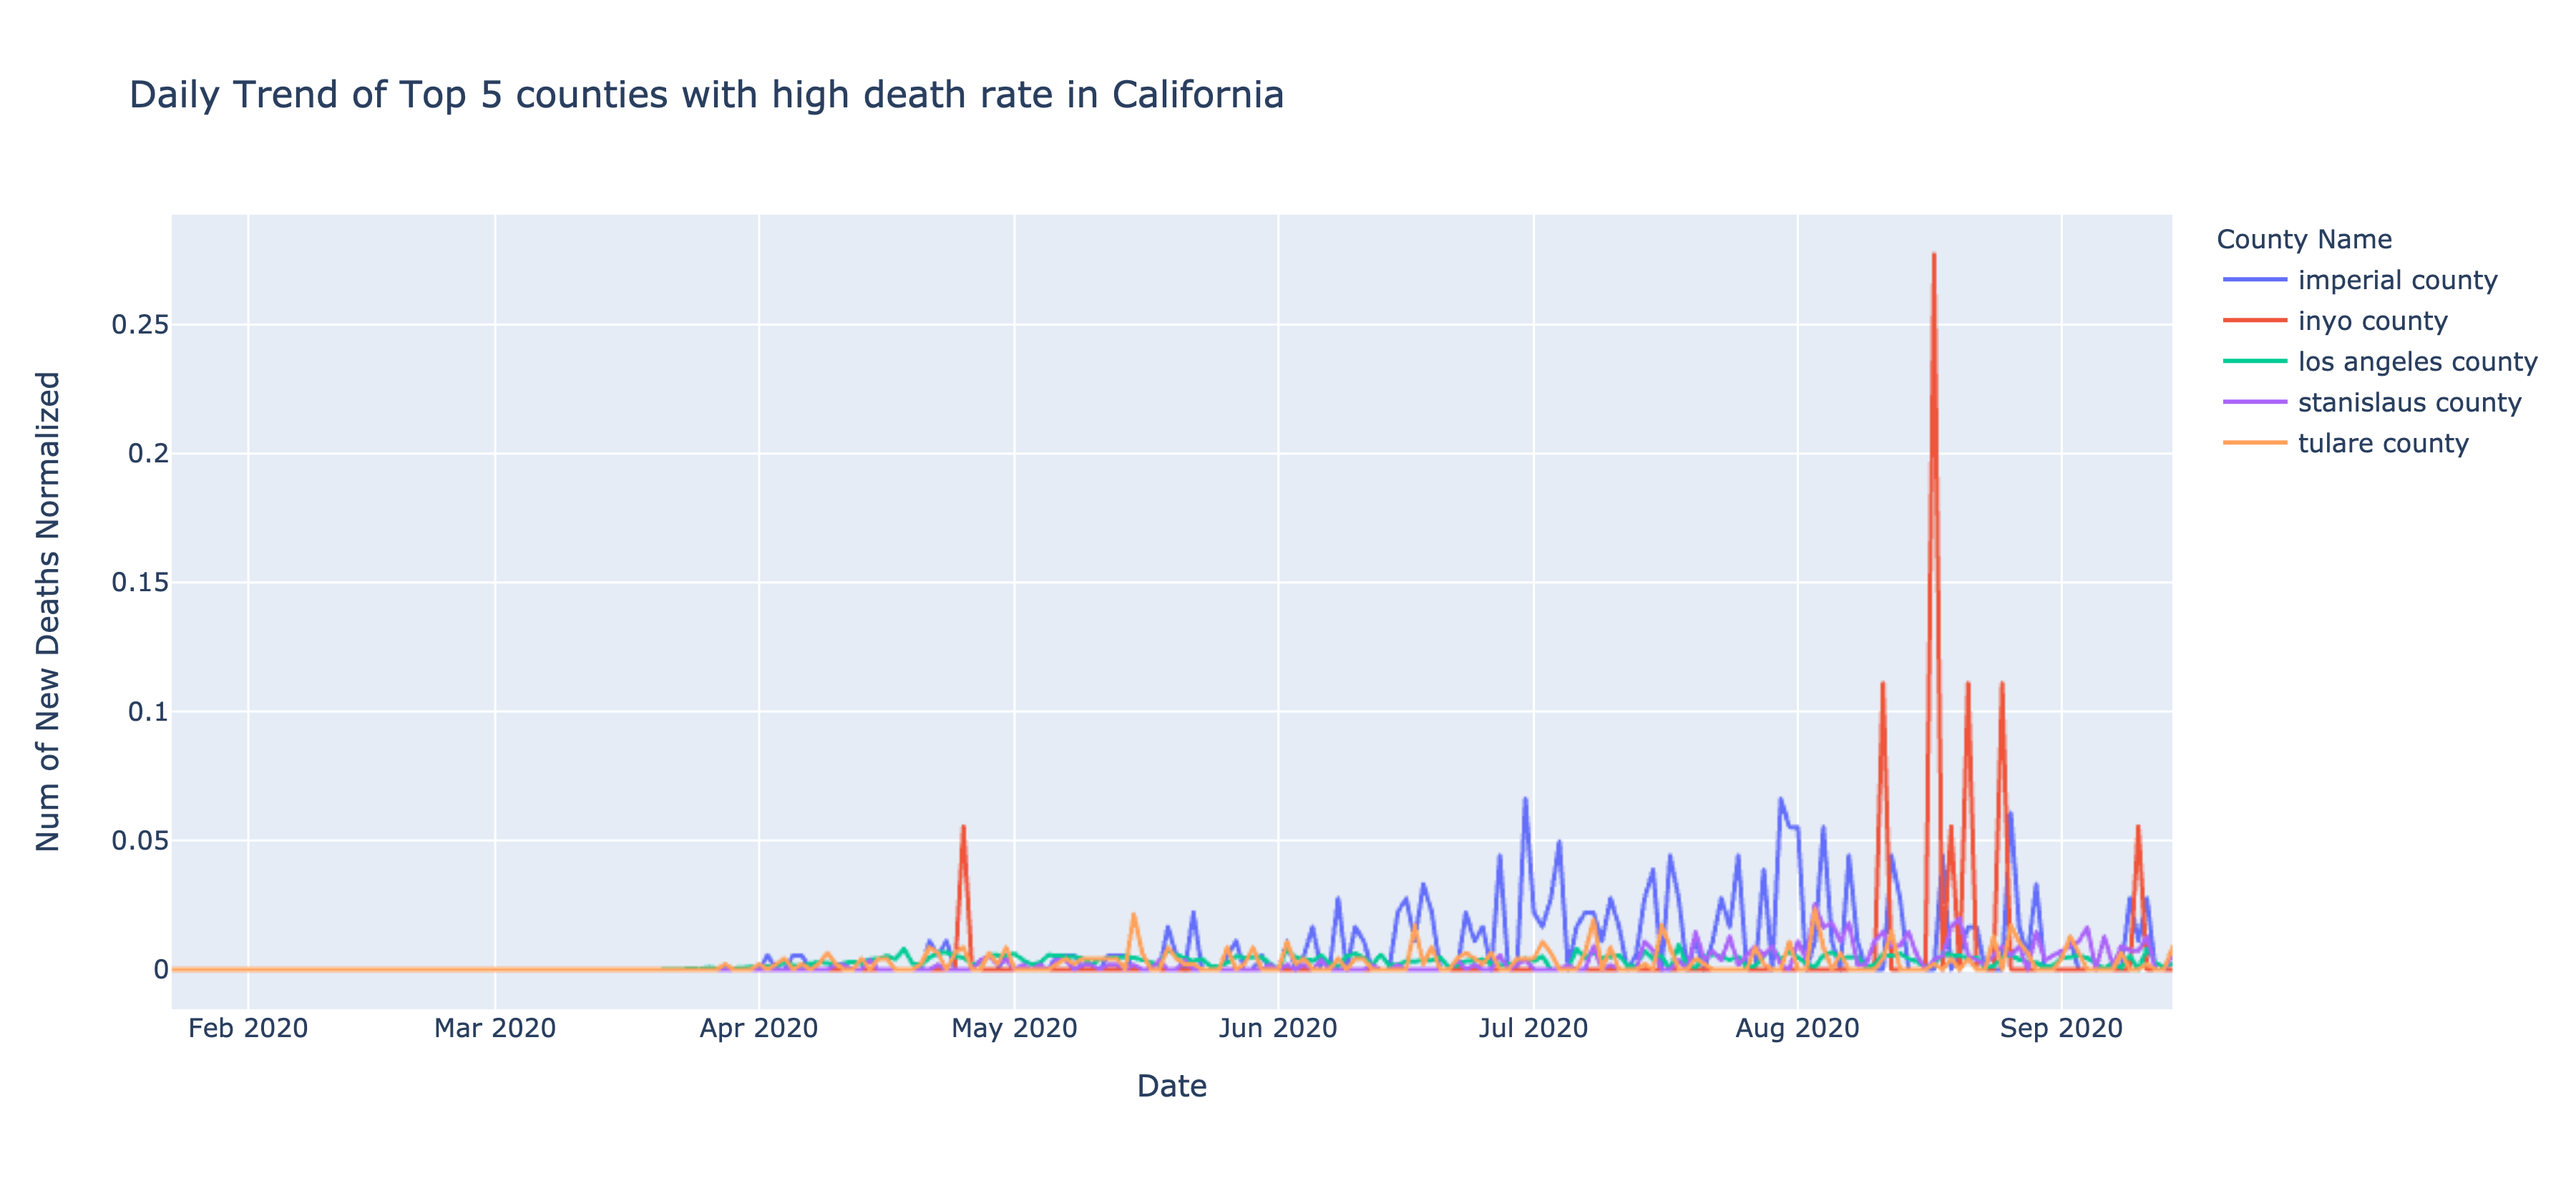

In [21]:
# Extracting per day data from COVID_CA dataframe using Top 5 countyFIPS value from COVID_CA_bycounty
COVID_top_5_counties_deaths = COVID_CA[COVID_CA["countyFIPS"].isin(COVID_CA_bycounty.sort_values(by=['Num of New Deaths Normalized'], ascending=False).head(6)['countyFIPS'])]

#Normalizing num of cases and deaths by population
COVID_top_5_counties_deaths['Num of New Cases Normalized'] = (COVID_top_5_counties_deaths['Num of New Cases']/COVID_top_5_counties_deaths['population'])*1000
COVID_top_5_counties_deaths['Num of New Deaths Normalized'] = (COVID_top_5_counties_deaths['Num of New Deaths']/COVID_top_5_counties_deaths['population'])*1000
COVID_top_5_counties_deaths = COVID_top_5_counties_deaths[COVID_top_5_counties_deaths['countyFIPS'] != 6021]

fig = px.line(COVID_top_5_counties_deaths, x="Date", y="Num of New Deaths Normalized", color="County Name", title="Daily Trend of Top 5 counties with high death rate in California")
fig.write_image("../images/top5deaths_counties_ca.png")
img_bytes = fig.to_image(format="png", width=1200, height=550, scale=3)
from IPython.display import Image
Image(img_bytes)

### Fit a distribution to the number of COVID-19 cases in California

#### Distribution Statistics 

In [22]:
print("mean =",COVID_CA_bydate["Num of New Cases Normalized"].mean())
print("variance =",COVID_CA_bydate["Num of New Cases Normalized"].var())
print("skewness =",COVID_CA_bydate["Num of New Cases Normalized"].skew())
print("kurtosis =",COVID_CA_bydate["Num of New Cases Normalized"].kurt())

mean = 82.20412697635791
variance = 7393.979196173028
skewness = 1.1907740152174369
kurtosis = 0.8608170185855353


#### Plot the distribution 

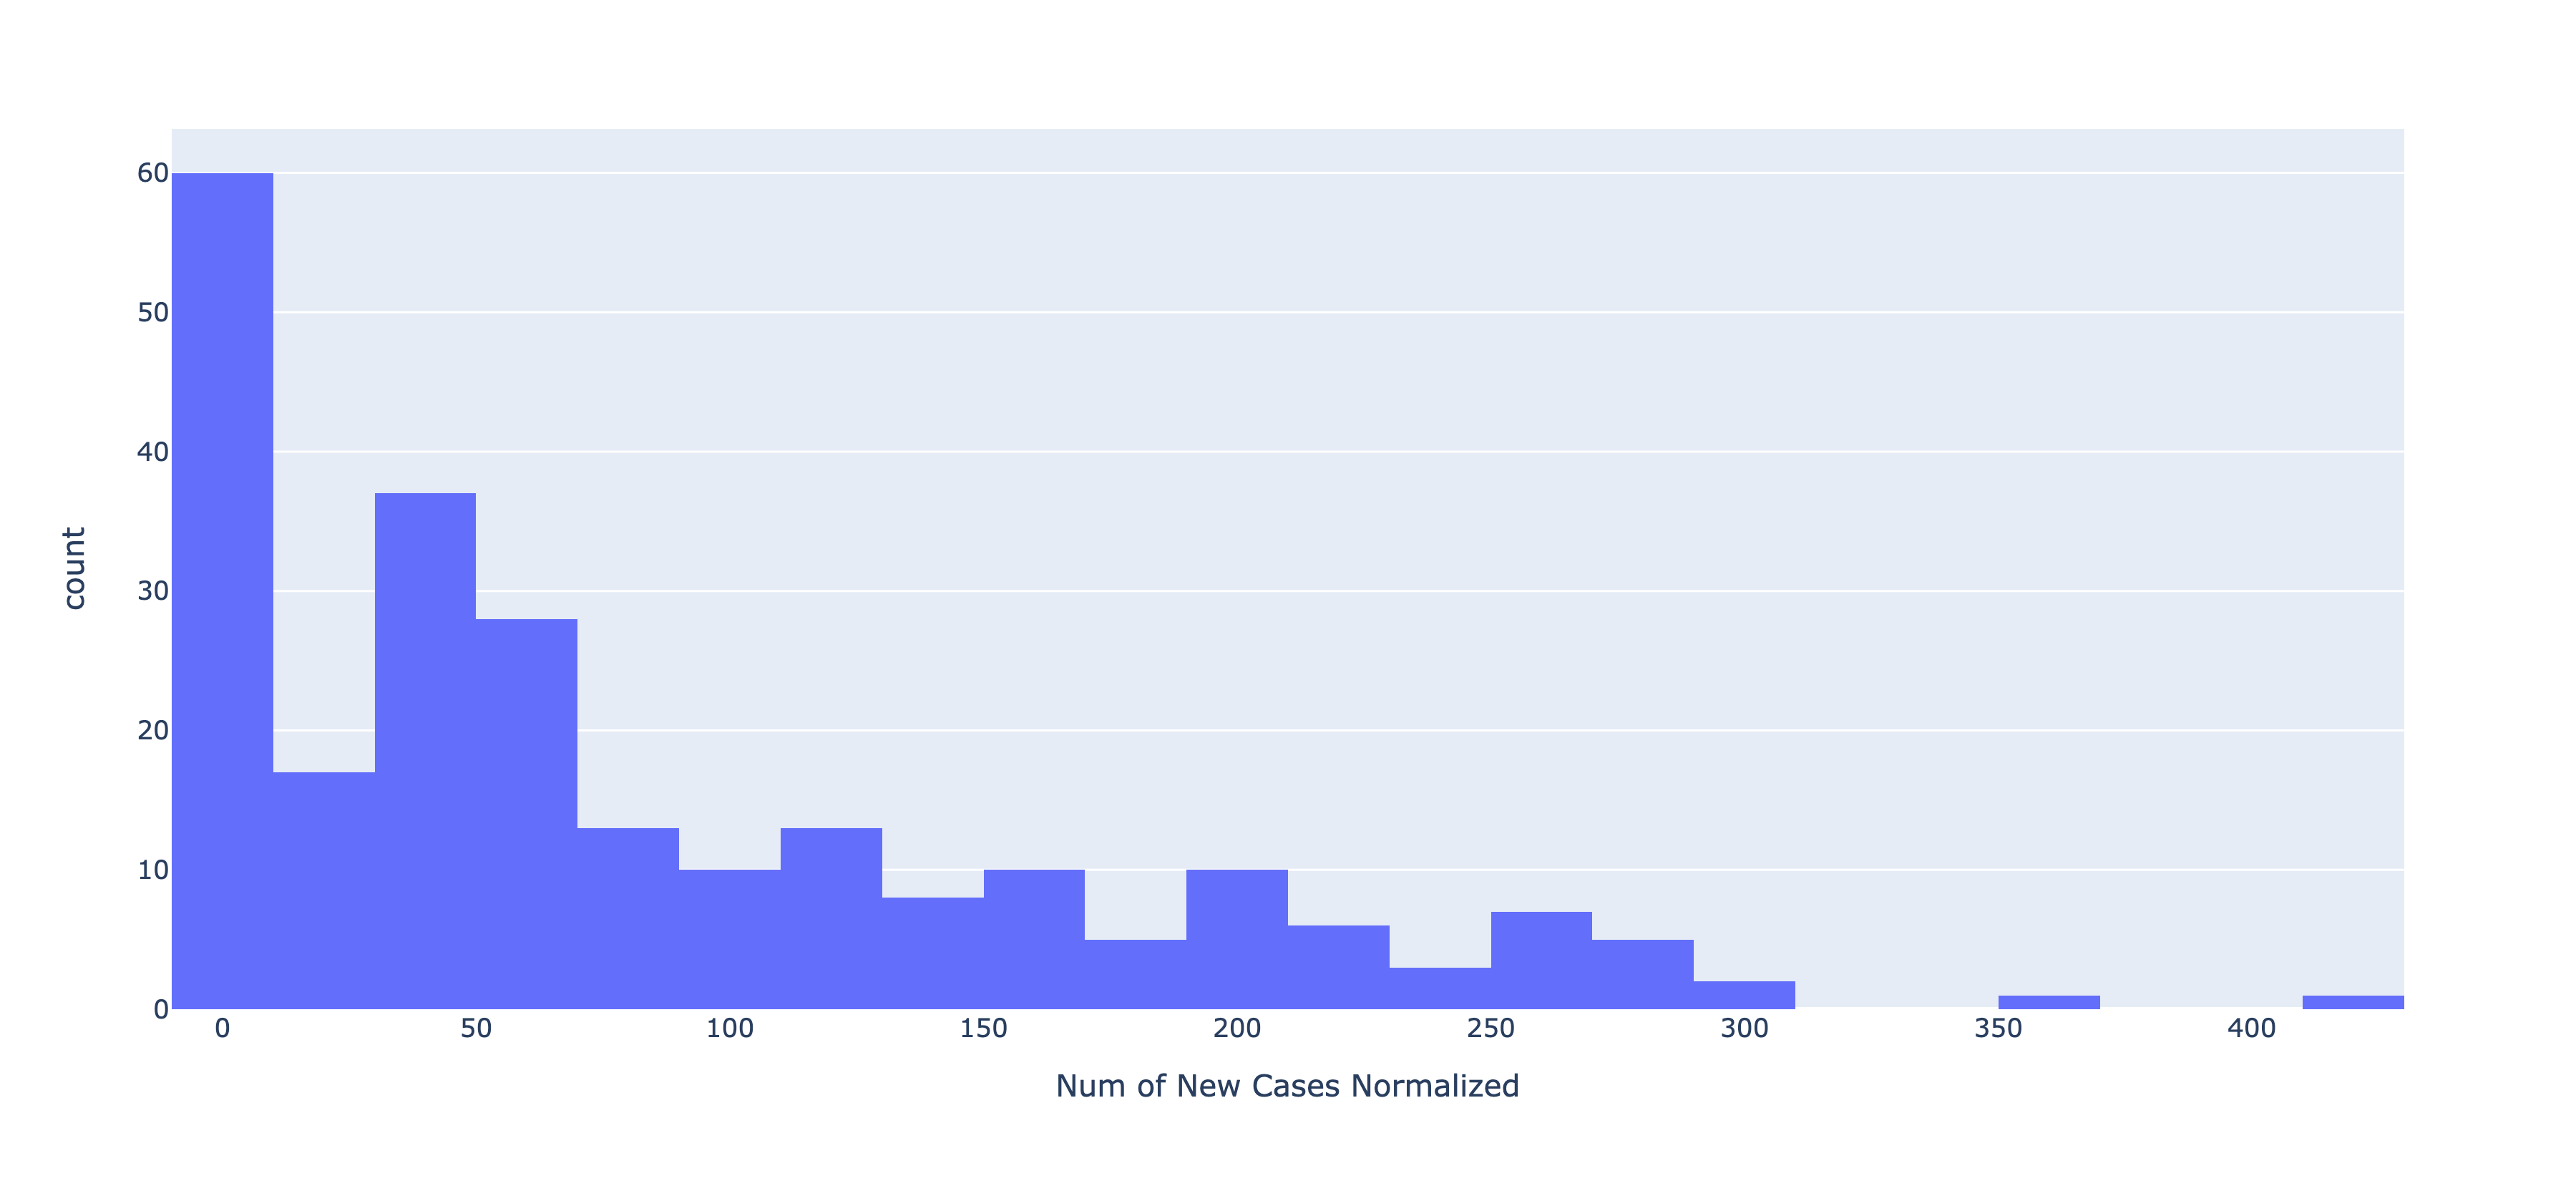

In [23]:
# Using COVID_CA_bydate to plot daily new cases in California
fig = px.histogram(COVID_CA_bydate, x="Num of New Cases Normalized",nbins=30)
fig.write_image("../images/hist_ca.png")
img_bytes = fig.to_image(format="png", width=1200, height=550, scale=3)
from IPython.display import Image
Image(img_bytes)

The "Num of New Cases" is a discrete variable <br>
From the histogram we can see that the data is left skewed and is decreasing towards right.<br>
From these observations we can say that this can be Poisson Distribution

#### Poisson Distribution for "Num of New Cases Normalized"

In [24]:
# Taking the range from the histogram as K values
k = [*range(0,430,10)]

# Calculating the lambda value by taking mean of "Num of New Cases Normalized
lambda_ = COVID_CA_bydate["Num of New Cases Normalized"].mean()
lambda_

82.20412697635791

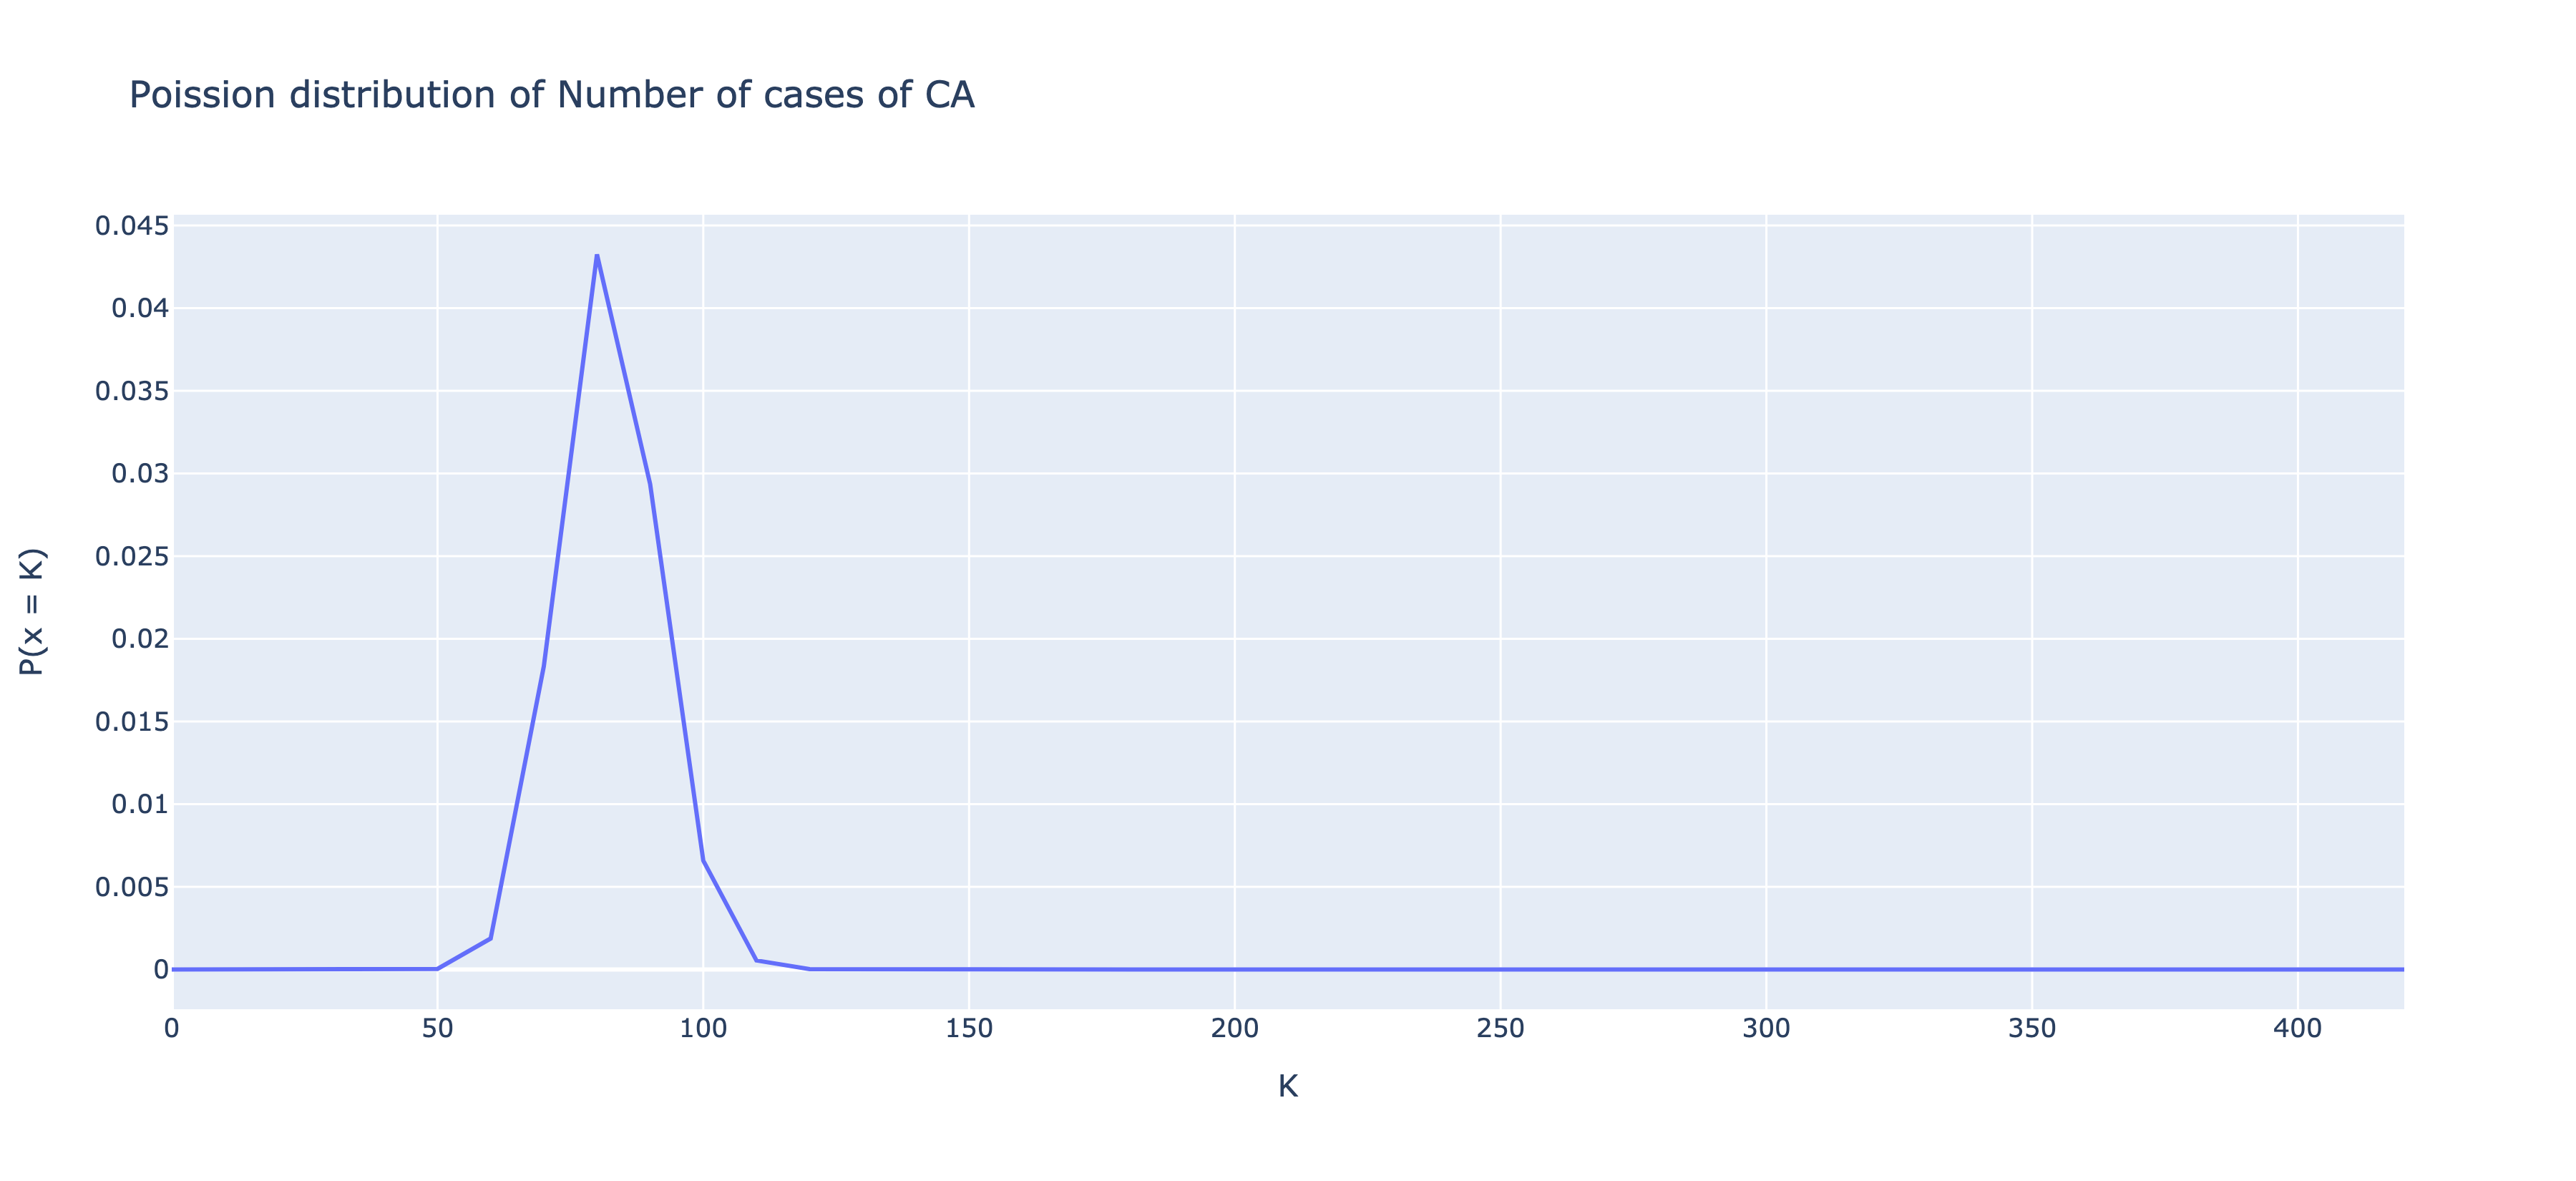

In [25]:
# Calculating OMF of poisson distribution
poisson_prob = poisson.pmf(k,lambda_)

fig = go.Figure()
fig = go.Figure(data=go.Scatter(x=k, y=poisson_prob))
fig.update_layout(
    title="Poission distribution of Number of cases of CA"
    ,xaxis_title="K"
    ,yaxis_title="P(x = K)"
    ,legend_title="Legend Title")
fig.write_image("../images/poisson_ca.png")
img_bytes = fig.to_image(format="png", width=1200, height=550, scale=3)
Image(img_bytes)

### Poission distribution of COVID-19 cases and deaths of a CA, NY, NC, TX, FL, VA

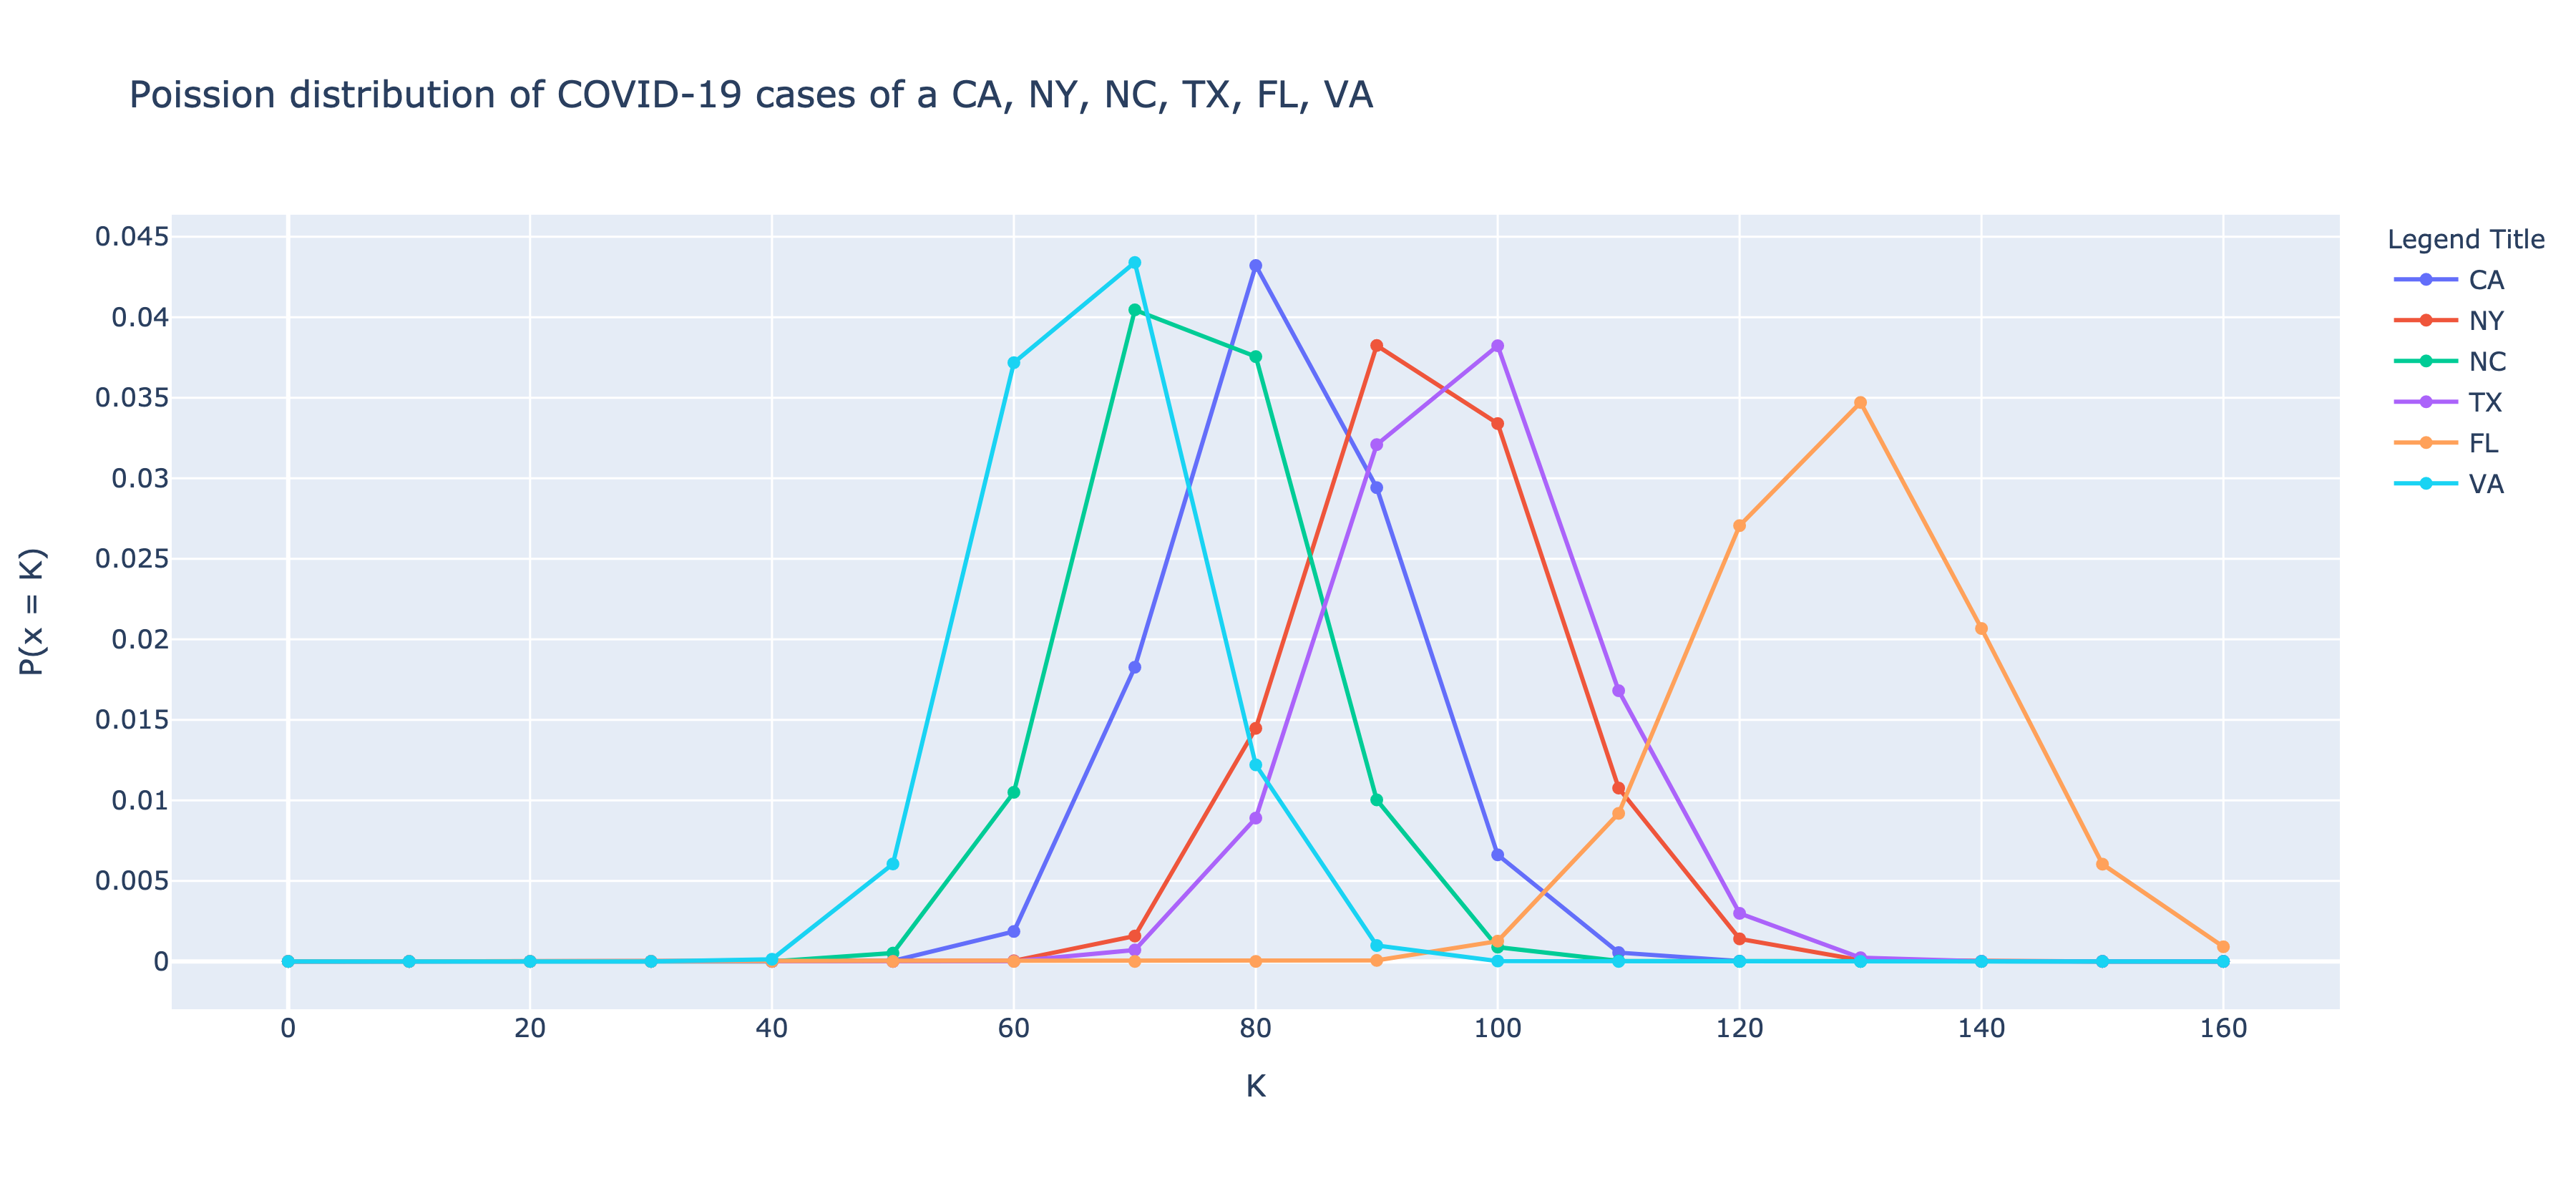

In [26]:
# k value for all the states
k = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]

#Calculation poisson probability distribution for all states using k values and lambda(mean value of new cases for each state)
poisson_prob_CA = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'CA']['Num of New Cases Normalized']['mean']))
poisson_prob_NY = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'NY']['Num of New Cases Normalized']['mean']))
poisson_prob_NC = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'NC']['Num of New Cases Normalized']['mean']))
poisson_prob_TX = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'TX']['Num of New Cases Normalized']['mean']))
poisson_prob_FL = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'FL']['Num of New Cases Normalized']['mean']))
poisson_prob_VA = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'VA']['Num of New Cases Normalized']['mean']))

fig = go.Figure()
fig.add_trace(go.Scatter(x=k, y=poisson_prob_CA, name="CA",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_NY, name="NY",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_NC, name="NC",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_TX, name="TX",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_FL, name="FL",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_VA, name="VA",
                    line_shape='linear'))
fig.update_layout(
    title="Poission distribution of COVID-19 cases of a CA, NY, NC, TX, FL, VA"
    ,xaxis_title="K"
    ,yaxis_title="P(x = K)"
    ,legend_title="Legend Title")
fig.write_image("../images/poisson_cases_5states_ca.png")
img_bytes = fig.to_image(format="png", width=1200, height=550, scale=3)
Image(img_bytes)

From the above Poisson Distribution of new cases for 6 States (CA, NY, NC, TX, FL, VA), we can observe that - <br>
1. New York state has higher Number of new cases per day compared to other states, as it has high probability at 100-160 range <br>
2. Virginia has least number of new cases recorded per day compared to other states <br>
3. North Carolina is closer to Virginia but has more more num of new cases compared to Virgina <br>
4. California has highest probability around 80 new cases per day <br>
5. Texas and New York have almost similar probability of number of new cases between 60-120 per day

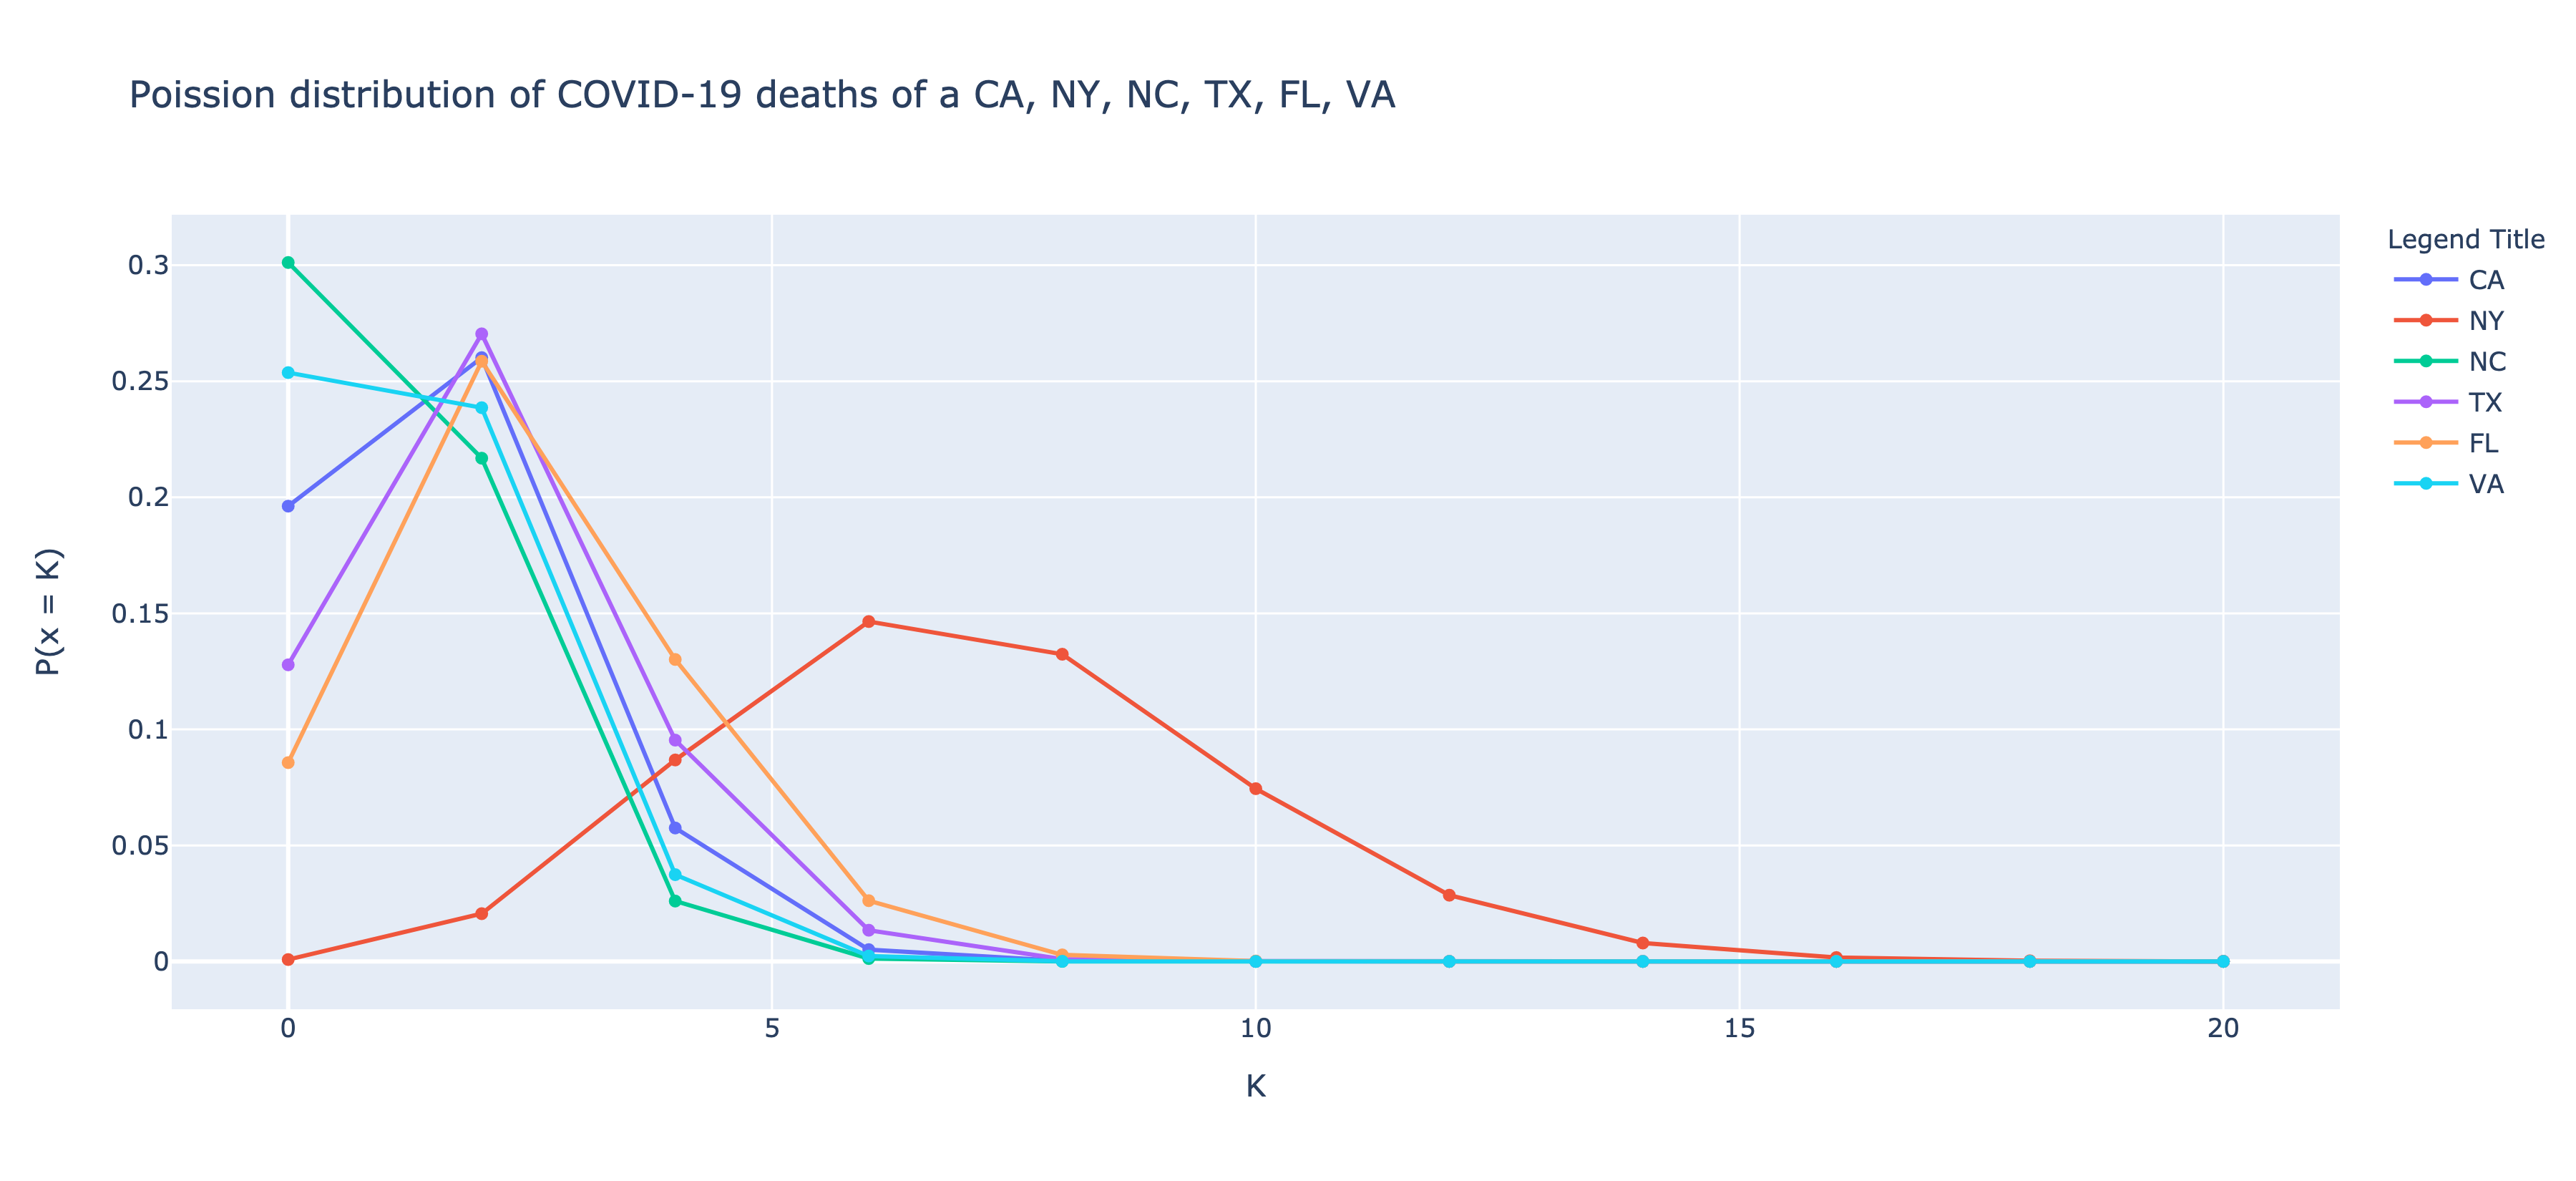

In [27]:
# k value for all the states
k = [0,2,4,6,8,10,12,14,16,18,20]

#Calculation of poisson probability distribution for all states using k values and lambda(mean value of new deaths for each state)
poisson_prob_CA = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'CA']['Num of New Deaths Normalized']['mean']))
poisson_prob_NY = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'NY']['Num of New Deaths Normalized']['mean']))
poisson_prob_NC = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'NC']['Num of New Deaths Normalized']['mean']))
poisson_prob_TX = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'TX']['Num of New Deaths Normalized']['mean']))
poisson_prob_FL = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'FL']['Num of New Deaths Normalized']['mean']))
poisson_prob_VA = poisson.pmf(k,(COVID_5_states_byweek_AGG[COVID_5_states_byweek_AGG['State'] == 'VA']['Num of New Deaths Normalized']['mean']))

fig = go.Figure()
fig.add_trace(go.Scatter(x=k, y=poisson_prob_CA, name="CA",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_NY, name="NY",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_NC, name="NC",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_TX, name="TX",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_FL, name="FL",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_VA, name="VA",
                    line_shape='linear'))
fig.update_layout(
    title="Poission distribution of COVID-19 deaths of a CA, NY, NC, TX, FL, VA"
    ,xaxis_title="K"
    ,yaxis_title="P(x = K)"
    ,legend_title="Legend Title")
fig.write_image("../images/poisson_deaths_5states_ca.png")
img_bytes = fig.to_image(format="png", width=1200, height=550, scale=3)
Image(img_bytes)

From the above Poisson Distribution of new deaths for 6 States (CA, NY, NC, TX, FL, VA), we can observe that - <br>

1. New York state has higher Number of new deaths per day compared to other states, as it has high probability at 5-10 range <br>
2. California, Virginia, Florida, North Carolina, Texas has higher probability of getting more number of deaths per day at around 2.5 <br> 

### Poission distributions for North Carolina counties COVID-19 in cases and deaths

In [28]:
# Extracting NC data and grouping by county
COVID_NC = COVID_5_states[(COVID_5_states['State'] =='NC')]
COVID_NC_bycounty = COVID_NC.groupby(['countyFIPS','County Name','population']).mean().reset_index()
COVID_NC_bycounty.head()

countyFIPS            County Name  population  Num of New Cases  \
0           0  statewide unallocated           0          7.483051   
1       37001        alamance county      169509         15.139831   
2       37003       alexander county       37497          1.995763   
3       37005       alleghany county       11137          0.927966   
4       37007           anson county       24446          2.182203   

   Num of New Deaths  
0           0.000000  
1           0.203390  
2           0.012712  
3           0.000000  
4           0.012712

In [29]:
# Normalizing new cases and deaths by population
COVID_NC_bycounty['Num of New Cases Normalized']= (COVID_NC_bycounty['Num of New Cases']/(COVID_NC_bycounty["population"]))*1000000
COVID_NC_bycounty['Num of New Deaths Normalized']= (COVID_NC_bycounty['Num of New Deaths']/(COVID_NC_bycounty["population"]))*1000000
COVID_NC_bycounty = COVID_NC_bycounty[COVID_NC_bycounty['countyFIPS'] != 0]
COVID_NC_bycounty.head()

countyFIPS       County Name  population  Num of New Cases  \
1       37001   alamance county      169509         15.139831   
2       37003  alexander county       37497          1.995763   
3       37005  alleghany county       11137          0.927966   
4       37007      anson county       24446          2.182203   
5       37009       ashe county       27203          1.021186   

   Num of New Deaths  Num of New Cases Normalized  \
1           0.203390                    89.315792   
2           0.012712                    53.224597   
3           0.000000                    83.322807   
4           0.012712                    89.266276   
5           0.004237                    37.539479   

   Num of New Deaths Normalized  
1                      1.199876  
2                      0.339010  
3                      0.000000  
4                      0.519998  
5                      0.155765

In [30]:
# Top 5 counties having high cases
top_5_cases_counties = COVID_NC_bycounty.sort_values(by=["Num of New Cases Normalized"], ascending=False).head(5)
top_5_cases_counties

countyFIPS        County Name  population  Num of New Cases  \
62       37123  montgomery county       27173          4.177966   
31       37061      duplin county       58741          8.987288   
78       37155     robeson county      130625         17.161017   
89       37177     tyrrell county        4016          0.466102   
84       37167      stanly county       62806          7.288136   

    Num of New Deaths  Num of New Cases Normalized  \
62           0.097458                   153.754319   
31           0.220339                   152.998555   
78           0.279661                   131.376206   
89           0.008475                   116.061179   
84           0.220339                   116.042028   

    Num of New Deaths Normalized  
62                      3.586561  
31                      3.751025  
78                      2.140946  
89                      2.110203  
84                      3.508247

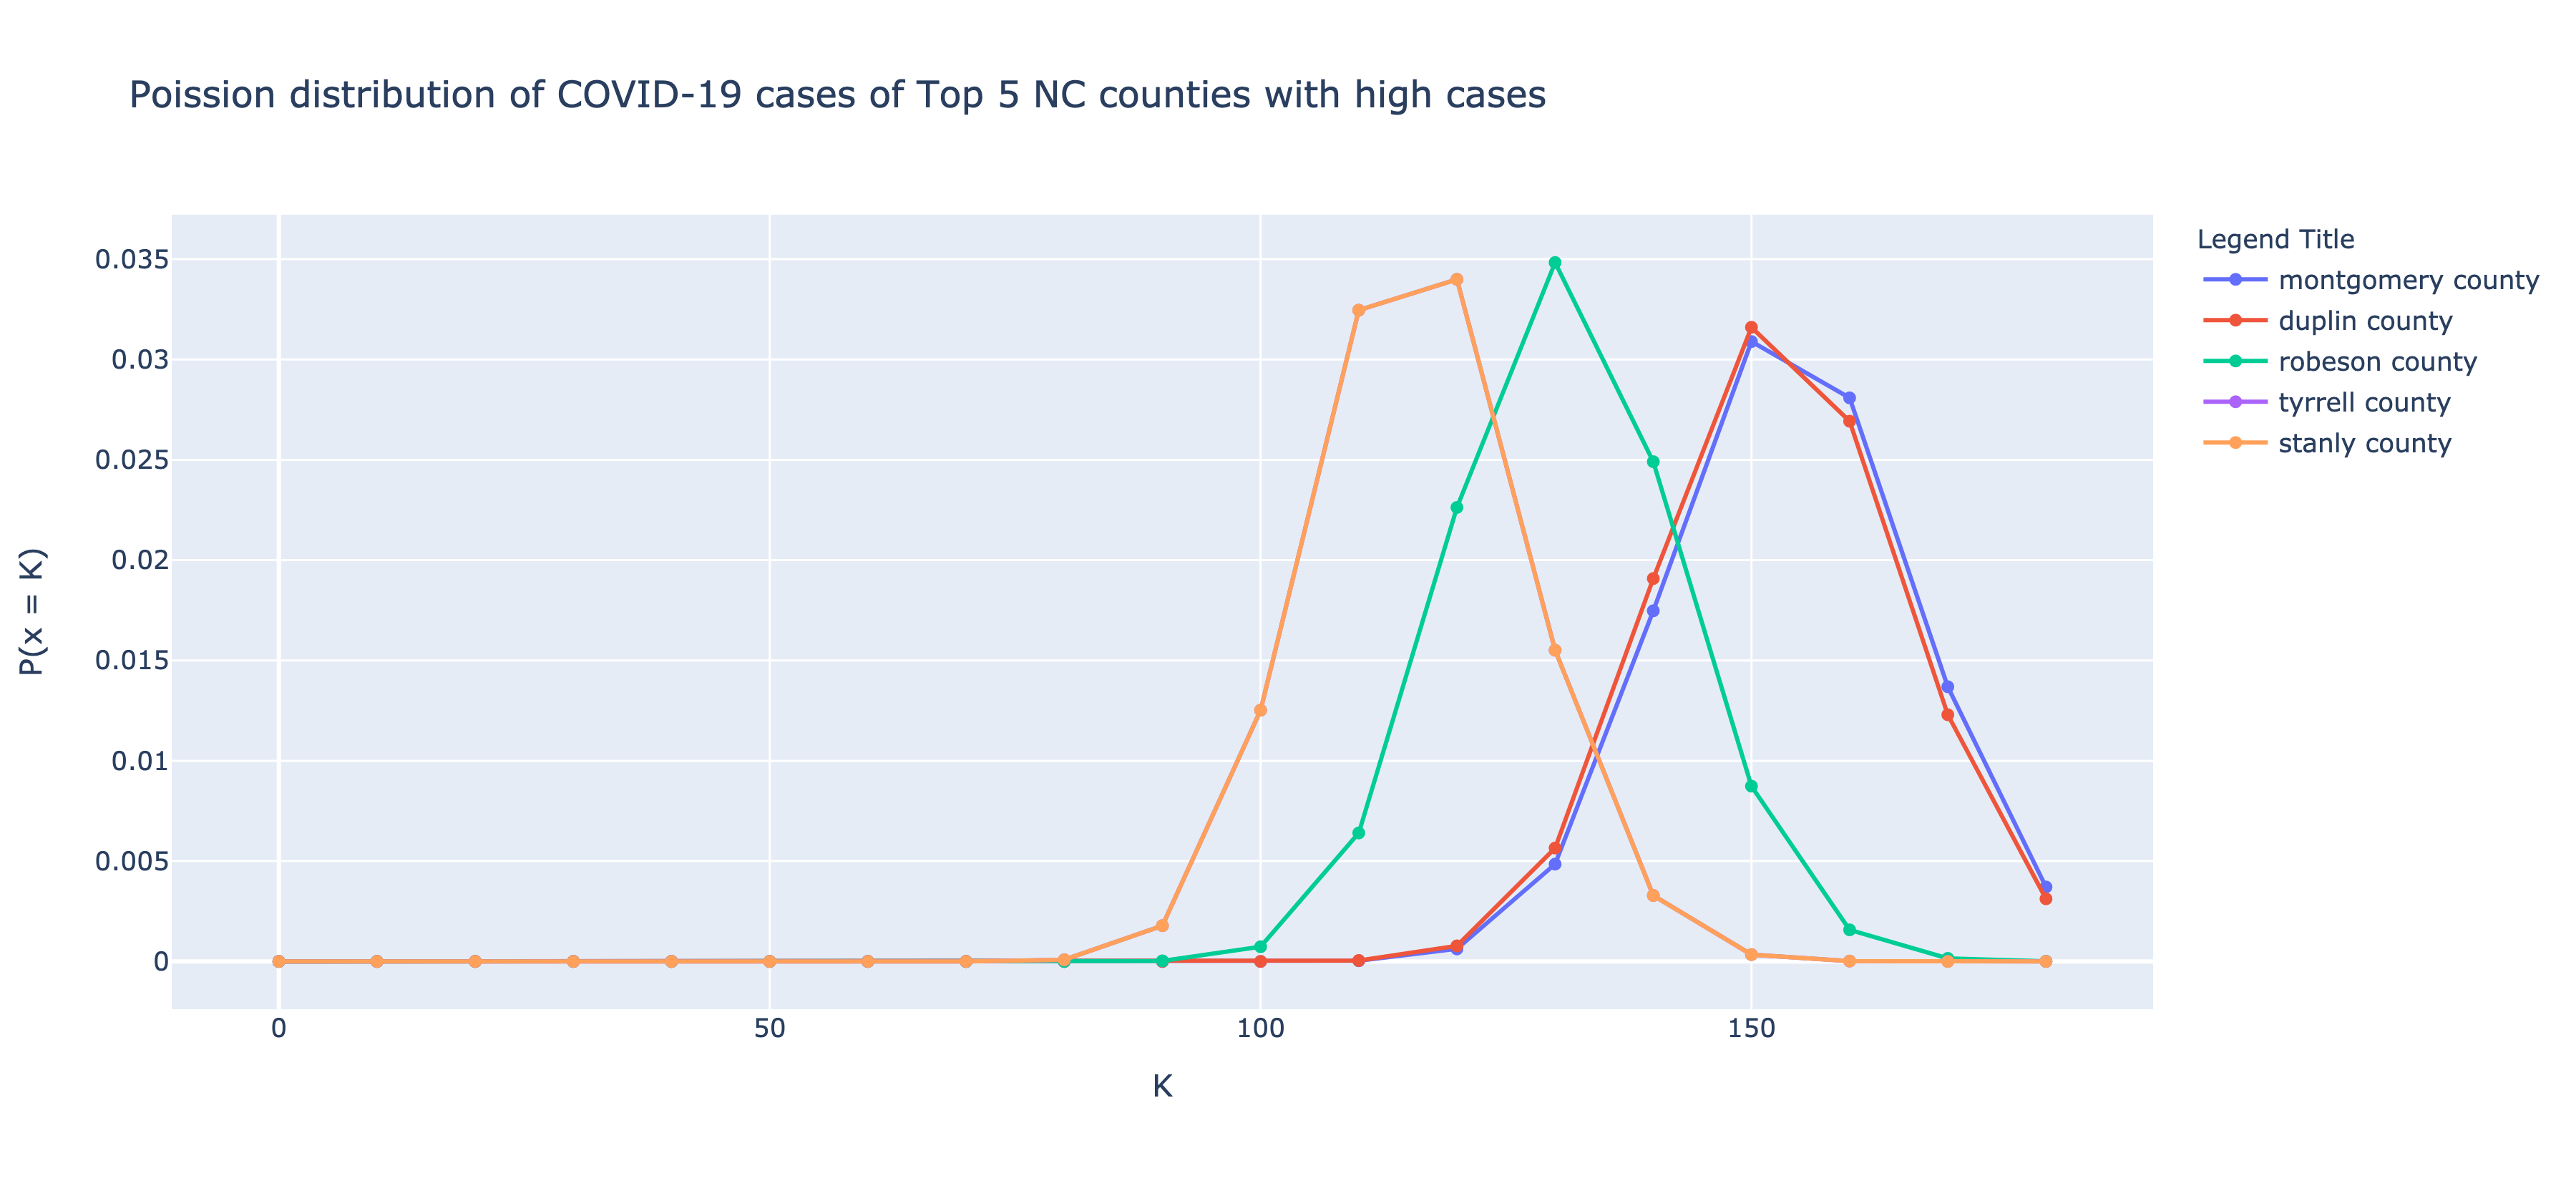

In [31]:
# k value for all the counties in NC
k = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180]

#Calculation of poisson probability distribution for top 5 counties using k values and lambda(mean value of new cases for each state)
poisson_prob_C1 = poisson.pmf(k,round(top_5_cases_counties['Num of New Cases Normalized'].iloc[0]))
poisson_prob_C2 = poisson.pmf(k,round(top_5_cases_counties['Num of New Cases Normalized'].iloc[1]))
poisson_prob_C3 = poisson.pmf(k,round(top_5_cases_counties['Num of New Cases Normalized'].iloc[2]))
poisson_prob_C4 = poisson.pmf(k,round(top_5_cases_counties['Num of New Cases Normalized'].iloc[3]))
poisson_prob_C5 = poisson.pmf(k,round(top_5_cases_counties['Num of New Cases Normalized'].iloc[4]))

fig = go.Figure()
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C1, name=top_5_cases_counties['County Name'].iloc[0],
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C2, name=top_5_cases_counties['County Name'].iloc[1],
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C3, name=top_5_cases_counties['County Name'].iloc[2],
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C4, name=top_5_cases_counties['County Name'].iloc[3],
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C5, name=top_5_cases_counties['County Name'].iloc[4],
                    line_shape='linear'))
fig.update_layout(
    title="Poission distribution of COVID-19 cases of Top 5 NC counties with high cases"
    ,xaxis_title="K"
    ,yaxis_title="P(x = K)"
    ,legend_title="Legend Title")
fig.write_image("../images/poisson_nc_cases_ca.png")
img_bytes = fig.to_image(format="png", width=1200, height=550, scale=3)
Image(img_bytes)

From the above Poisson Distribution of new cases for top counties with High cases rate in NC, we can observe that - <br>

1. Duplin and Montgomery counties have high num of cases per day as the probability is higher for these counties at 150 <br>
2. Stanly County has least Number of cases per day compared to other states <br>
3. Robeson County has high probability of Number of cases per day at around 125. <br>

In [32]:
# Top 5 counties having high deaths
top_5_deaths_counties = COVID_NC_bycounty.sort_values(by=["Num of New Deaths Normalized"], ascending=False).head(5)
top_5_deaths_counties

countyFIPS      County Name  population  Num of New Cases  \
52       37103     jones county        9419          0.597458   
46       37091  hertford county       23677          2.720339   
91       37181     vance county       44535          4.182203   
24       37047  columbus county       55508          5.343220   
31       37061    duplin county       58741          8.987288   

    Num of New Deaths  Num of New Cases Normalized  \
52           0.046610                    63.431110   
46           0.101695                   114.893736   
91           0.182203                    93.908238   
24           0.220339                    96.260365   
31           0.220339                   152.998555   

    Num of New Deaths Normalized  
52                      4.948526  
46                      4.295093  
91                      4.091240  
24                      3.969500  
31                      3.751025

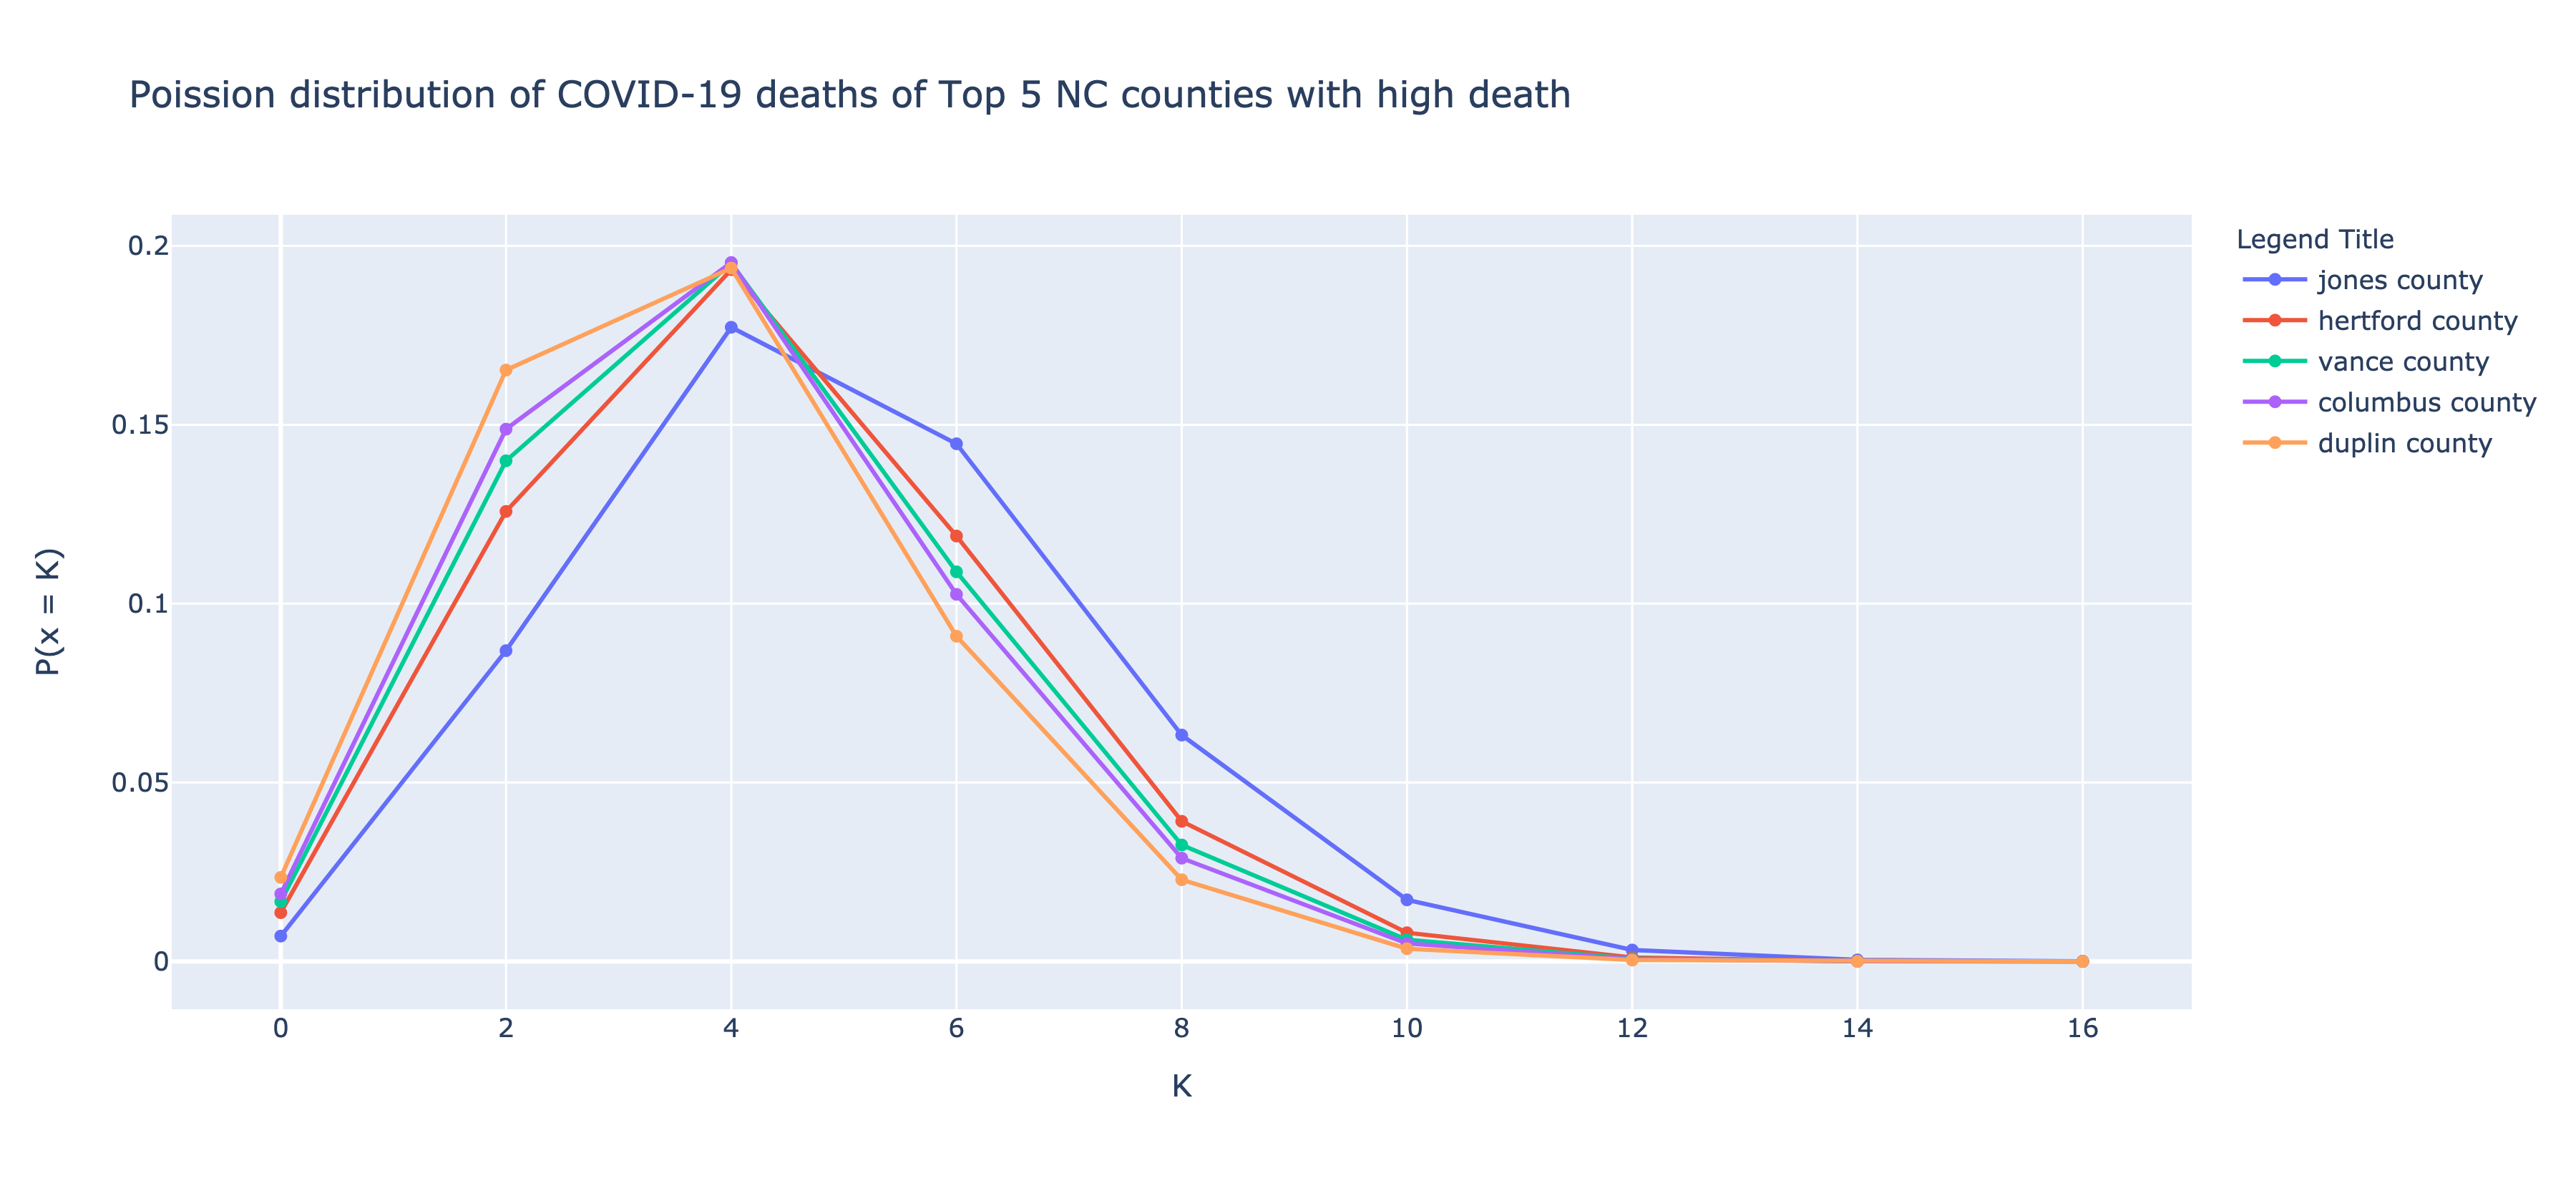

In [33]:
# k value for all the counties in NC
k = [0,2,4,6,8,10,12,14,16]

#Calculation of poisson probability distribution for top 5 counties using k values and lambda(mean value of new deaths for each state)
poisson_prob_C1 = poisson.pmf(k,(top_5_deaths_counties['Num of New Deaths Normalized'].iloc[0]))
poisson_prob_C2 = poisson.pmf(k,(top_5_deaths_counties['Num of New Deaths Normalized'].iloc[1]))
poisson_prob_C3 = poisson.pmf(k,(top_5_deaths_counties['Num of New Deaths Normalized'].iloc[2]))
poisson_prob_C4 = poisson.pmf(k,(top_5_deaths_counties['Num of New Deaths Normalized'].iloc[3]))
poisson_prob_C5 = poisson.pmf(k,(top_5_deaths_counties['Num of New Deaths Normalized'].iloc[4]))

fig = go.Figure()
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C1, name=top_5_deaths_counties['County Name'].iloc[0],
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C2, name=top_5_deaths_counties['County Name'].iloc[1],
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C3, name=top_5_deaths_counties['County Name'].iloc[2],
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C4, name=top_5_deaths_counties['County Name'].iloc[3],
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=k, y=poisson_prob_C5, name=top_5_deaths_counties['County Name'].iloc[4],
                    line_shape='linear'))
fig.update_layout(
    title="Poission distribution of COVID-19 deaths of Top 5 NC counties with high death"
    ,xaxis_title="K"
    ,yaxis_title="P(x = K)"
    ,legend_title="Legend Title")
fig.write_image("../images/poisson_nc_deaths_ca.png")
img_bytes = fig.to_image(format="png", width=1200, height=550, scale=3)
Image(img_bytes)

From the above Poisson Distribution of new deaths for top counties with High death rate in NC, we can observe that - <br>

1. Jones county is slightly have more Number of Deaths per day compared to other counties as its range of high probability is between 4-8 <br>
2. Other counties have high probability of around 4 deaths per day

### Corelation between Enrichment data variables and COVID-19 cases 

In [35]:
enrichment_merged_data = pd.read_csv('../data/COVID_HospitalBeds_merged_df.csv')

# Considering last date in dataframe for every hospital to get total cases and deaths for that specific county
enrichment_merged_data= enrichment_merged_data[enrichment_merged_data['Date'] == '2020-09-14']

enrichment_merged_data.head()

State  countyFIPS     County Name        Date  Num of Cases  \
236     AL        1001  autauga county  2020-09-14          1585   
1181    AL        1003  baldwin county  2020-09-14          4978   
1182    AL        1003  baldwin county  2020-09-14          4978   
1183    AL        1003  baldwin county  2020-09-14          4978   
1184    AL        1003  baldwin county  2020-09-14          4978   

      Num of Deaths  population                          HOSPITAL_NAME  \
236              24       55869            Prattville Baptist Hospital   
1181             47      223234                        Thomas Hospital   
1182             47      223234                North Baldwin Infirmary   
1183             47      223234  South Baldwin Regional Medical Center   
1184             47      223234                    EastPointe Hospital   

                       HOSPITAL_TYPE      HQ_CITY  HQ_ZIP_CODE  \
236   Short Term Acute Care Hospital   Prattville        36067   
1181  Short Term Acute Care Hospital     Fairhope        36532   
1182  Short Term Acute Care Hospital  Bay Minette        36507   
1183  Short Term Acute Care Hospital        Foley        36535   
1184            Psychiatric Hospital       Daphne        36526   

      NUM_LICENSED_BEDS  NUM_STAFFED_BEDS  NUM_ICU_BEDS  ADULT_ICU_BEDS  \
236                  85                55             6               6   
1181                150               129            17              17   
1182                 58                55             4               4   
1183                112               112            30              30   
1184                 66                66             0               0   

      PEDI_ICU_BEDS  BED_UTILIZATION  Potential_Increase_In_Bed_Capac  \
236               0         0.623113                               30   
1181              0         0.770054                               21   
1182              0         0.285131                                3   
1183              0         0.601223                                0   
1184              0         0.592403                                0   

      AVG_VENTILATOR_USAGE  
236                      2  
1181                     3  
1182                     2  
1183                     3  
1184                     0

In [36]:
# Aggregating state wide
enrichment_merged_data = enrichment_merged_data.groupby(['State','countyFIPS','County Name','population','Num of Cases','Num of Deaths']).sum().reset_index()
enrichment_merged_data.head()


State  countyFIPS                   County Name  population  Num of Cases  \
0    AK        2020     municipality of anchorage      288000          3591   
1    AK        2050            bethel census area       18386            80   
2    AK        2070        dillingham census area        4916             6   
3    AK        2090  fairbanks north star borough       96849           884   
4    AK        2110    city and borough of juneau       31974           240   

   Num of Deaths  HQ_ZIP_CODE  NUM_LICENSED_BEDS  NUM_STAFFED_BEDS  \
0             27       895561               1152               973   
1              1        99559                 50                34   
2              0        99576                 16                16   
3              9       199404                175               145   
4              1        99801                 73                45   

   NUM_ICU_BEDS  ADULT_ICU_BEDS  PEDI_ICU_BEDS  BED_UTILIZATION  \
0           109             109             76         3.026601   
1             6               6              0         0.399919   
2             3               3              0         0.148459   
3            13              13              0         0.395464   
4             9               9              0         0.365967   

   Potential_Increase_In_Bed_Capac  AVG_VENTILATOR_USAGE  
0                              179                    21  
1                               16                     1  
2                                0                     1  
3                               30                     2  
4                               28                     2

In [37]:
state = enrichment_merged_data.groupby(['State']).sum().reset_index()

state=state.drop(['countyFIPS','HQ_ZIP_CODE'], axis=1)

state.head()

State  population  Num of Cases  Num of Deaths  NUM_LICENSED_BEDS  \
0    AK      684969          6159             43               1832   
1    AL     4808023        136463           2293              18611   
2    AR     2701486         61060            878              12729   
3    AZ     7269219        208667           5319              18345   
4    CA    39508089        765446          14467              83240   

   NUM_STAFFED_BEDS  NUM_ICU_BEDS  ADULT_ICU_BEDS  PEDI_ICU_BEDS  \
0              1532           193             193             76   
1             15138          1637            1637            569   
2             10012           914             914            247   
3             15695          1882            1882            532   
4             77808          8652            8652           3858   

   BED_UTILIZATION  Potential_Increase_In_Bed_Capac  AVG_VENTILATOR_USAGE  
0         8.963031                              300                    41  
1        52.147326                             3473                   383  
2        42.606742                             2717                   261  
3        56.815879                             2650                   427  
4       216.458434                             5432                  1986

In [38]:
#Corelation of covid cases and hospital beds data
state.corr()

population  Num of Cases  Num of Deaths  \
population                         1.000000      0.956338       0.737857   
Num of Cases                       0.956338      1.000000       0.754469   
Num of Deaths                      0.737857      0.754469       1.000000   
NUM_LICENSED_BEDS                  0.968713      0.943899       0.753354   
NUM_STAFFED_BEDS                   0.978372      0.952177       0.753627   
NUM_ICU_BEDS                       0.969146      0.948083       0.687233   
ADULT_ICU_BEDS                     0.969146      0.948083       0.687233   
PEDI_ICU_BEDS                      0.965661      0.951297       0.693105   
BED_UTILIZATION                    0.934745      0.910320       0.680748   
Potential_Increase_In_Bed_Capac    0.718498      0.707812       0.608043   
AVG_VENTILATOR_USAGE               0.967335      0.941139       0.776763   

                                 NUM_LICENSED_BEDS  NUM_STAFFED_BEDS  \
population                                0.968713          0.978372   
Num of Cases                              0.943899          0.952177   
Num of Deaths                             0.753354          0.753627   
NUM_LICENSED_BEDS                         1.000000          0.996678   
NUM_STAFFED_BEDS                          0.996678          1.000000   
NUM_ICU_BEDS                              0.988730          0.991694   
ADULT_ICU_BEDS                            0.988730          0.991694   
PEDI_ICU_BEDS                             0.948528          0.957703   
BED_UTILIZATION                           0.974798          0.972772   
Potential_Increase_In_Bed_Capac           0.832204          0.784280   
AVG_VENTILATOR_USAGE                      0.990261          0.991376   

                                 NUM_ICU_BEDS  ADULT_ICU_BEDS  PEDI_ICU_BEDS  \
population                           0.969146        0.969146       0.965661   
Num of Cases                         0.948083        0.948083       0.951297   
Num of Deaths                        0.687233        0.687233       0.693105   
NUM_LICENSED_BEDS                    0.988730        0.988730       0.948528   
NUM_STAFFED_BEDS                     0.991694        0.991694       0.957703   
NUM_ICU_BEDS                         1.000000        1.000000       0.960755   
ADULT_ICU_BEDS                       1.000000        1.000000       0.960755   
PEDI_ICU_BEDS                        0.960755        0.960755       1.000000   
BED_UTILIZATION                      0.981905        0.981905       0.947803   
Potential_Increase_In_Bed_Capac      0.780281        0.780281       0.705448   
AVG_VENTILATOR_USAGE                 0.980990        0.980990       0.937844   

                                 BED_UTILIZATION  \
population                              0.934745   
Num of Cases                            0.910320   
Num of Deaths                           0.680748   
NUM_LICENSED_BEDS                       0.974798   
NUM_STAFFED_BEDS                        0.972772   
NUM_ICU_BEDS                            0.981905   
ADULT_ICU_BEDS                          0.981905   
PEDI_ICU_BEDS                           0.947803   
BED_UTILIZATION                         1.000000   
Potential_Increase_In_Bed_Capac         0.802980   
AVG_VENTILATOR_USAGE                    0.963374   

                                 Potential_Increase_In_Bed_Capac  \
population                                              0.718498   
Num of Cases                                            0.707812   
Num of Deaths                                           0.608043   
NUM_LICENSED_BEDS                                       0.832204   
NUM_STAFFED_BEDS                                        0.784280   
NUM_ICU_BEDS                                            0.780281   
ADULT_ICU_BEDS                                          0.780281   
PEDI_ICU_BEDS                                           0.705448   
BED_UTILIZATION                                         0

From the above corelation,we can observe following - <br>
1. The "Num of Cases" has strong positive corelation with NUM_STAFFED_BEDS having value = 0.95 where as it is less for "Num of Deaths" having 0.75 value. <br>
2. The "Num of Cases" has strong positive corelation with AVG_VENTILATOR_USAGE having value = 0.94 where as it is less for "Num of Deaths" having 0.77 value. <br>
We can see that the number of beds is strongle correlated with new cases compared to new deaths.

### Hypothesis between Enrichment data and number of cases, deaths to be compared against states.

Comparing "Num of Cases" and "Num of Deaths" with 3 variables 'NUM_STAFFED_BEDS', 'BED_UTILIZATION', 'AVG_VENTILATOR_USAGE'  - <br>

1. Does higher number of staffed beds has any impact in decrease of the number COVID cases and deaths? <br>
2. Will higher average ventilator usage affects the number COVID cases? <br>
3. Does BED_UTILIZATION rate affect decrease in the number of COVID Cases and deaths?